In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
url_orderlines = "https://drive.google.com/file/d/1gljmzGC4RNhKhto-Ui1RHO__9oSmBdZQ/view?usp=sharing" # orderlines_qu.csv
path_orderlines = "https://drive.google.com/uc?export=download&id="+url_orderlines.split("/")[-2]
orderlines_df = pd.read_csv(path_orderlines)

In [114]:
url_orders = "https://drive.google.com/file/d/1n7HqO25e9luc-SrB5RypLEbksgivQVrd/view?usp=drive_link" # orders_qu.csv
path_orders = "https://drive.google.com/uc?export=download&id="+url_orders.split("/")[-2]
orders_df = pd.read_csv(path_orders)

In [115]:
url_products = "https://drive.google.com/file/d/1zTqkI2UP7oL-Jp0mFgEhORjgaB9hWvtm/view?usp=drive_link" # category_type.csv
path_products = "https://drive.google.com/uc?export=download&id="+url_products.split("/")[-2]
typename_df = pd.read_csv(path_products).loc[:, ['type', 'type_name']].drop_duplicates()

In [116]:
url_brands = "https://drive.google.com/file/d/1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD/view?usp=sharing" # brands.csv
path_brands = "https://drive.google.com/uc?export=download&id="+url_brands.split("/")[-2]
brands_df = pd.read_csv(path_brands)

In [117]:
url = "https://drive.google.com/file/d/1wkMlMZP1hRpNAbUEe18wSU4Ak0tYhh3V/view?usp=sharing" # product_category_df.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_df = pd.read_csv(path)

In [118]:
products_df = products_df.fillna(0)
products_df = products_df.merge(typename_df.loc[:, ['type', 'type_name']], on='type', how='left')
products_df = products_df.drop(columns=['Unnamed: 0', 'Unnamed: 8'])
products_df = products_df.fillna('Other')

    How should products be classified into different categories to simplify reports and analysis?
    What is the distribution of product prices across different categories?
    How many products are being discounted?
    How big are the offered discounts as a percentage of the product prices?
    How do seasonality and special dates (Christmas, Black Friday) affect sales?
    How could data collection be improved?

How many orders are there?
How many products are there?
What period of time do these orders comprise?
How many orders are Completed?
How should revenue be computed?

How many orders are there?

In [119]:
total_orders = orders_df.shape[0]
print(f'There is a total of {total_orders} orders.')

There is a total of 40985 orders.


In [120]:
orders_df = orders_df.drop(columns='state')
orders_df

,order_id,created_date,total_paid
0,241423,2017-11-06 13:10:02,136.15
1,242832,2017-12-31 17:40:03,15.76
2,243330,2017-02-16 10:59:38,84.98
3,245275,2017-06-28 11:35:37,149.00
4,245595,2017-01-21 12:52:47,112.97
...,...,...,...
40980,527042,2018-03-14 11:47:50,18.98
40981,527070,2018-03-14 11:50:48,24.97
40982,527074,2018-03-14 11:51:42,24.97
40983,527096,2018-03-14 11:58:40,34.96


How many products are there?

In [121]:
products_df.loc[:, 'sku'].nunique()

9992

In [122]:
products_df.loc[:, 'name'].nunique()

9836

In [123]:
print(f'There are {products_df.loc[:, "sku"].nunique()} different products in the catalogue.')

There are 9992 different products in the catalogue.


What period of time do these orders comprise?

In [124]:
# prompt: Get the earliest and the latest date in orders_df

# Convert the 'created_date' column to datetime objects
orders_df['created_date'] = pd.to_datetime(orders_df['created_date'])

# Get the earliest and latest dates
earliest_date = orders_df['created_date'].min()
latest_date = orders_df['created_date'].max()

print(f"Orders were created between {earliest_date} and {latest_date}.")


Orders were created between 2017-01-01 01:51:47 and 2018-03-14 12:03:52.


How should revenue be computed?

In [125]:
orders_df.loc[:, 'total_paid'].sum()

np.float64(7978675.599999999)

In [126]:
orders_df['yearmonth'] = orders_df.loc[:, 'created_date'].agg(lambda x: x.dt.strftime('%Y-%m'))

In [127]:
orders_df

,order_id,created_date,total_paid,yearmonth
0,241423,2017-11-06 13:10:02,136.15,2017-11
1,242832,2017-12-31 17:40:03,15.76,2017-12
2,243330,2017-02-16 10:59:38,84.98,2017-02
3,245275,2017-06-28 11:35:37,149.00,2017-06
4,245595,2017-01-21 12:52:47,112.97,2017-01
...,...,...,...,...
40980,527042,2018-03-14 11:47:50,18.98,2018-03
40981,527070,2018-03-14 11:50:48,24.97,2018-03
40982,527074,2018-03-14 11:51:42,24.97,2018-03
40983,527096,2018-03-14 11:58:40,34.96,2018-03


<Axes: xlabel='Date', ylabel='Revenue'>

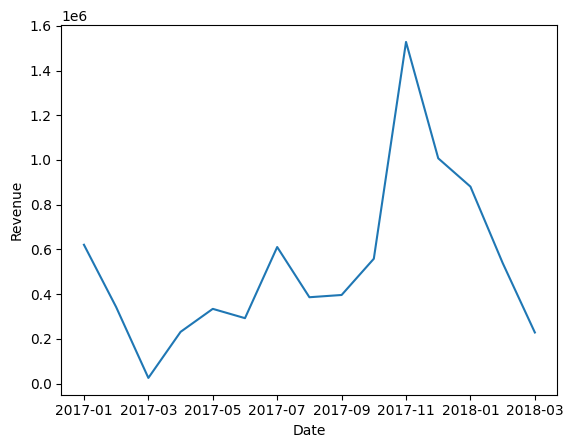

In [128]:
revenue_per_month = orders_df.groupby('yearmonth')['total_paid'].sum()
revenue_per_month.plot.line(x='yearmonth', y='total_paid', xlabel='Date', ylabel='Revenue')

How should products be classified into different categories to simplify reports and analysis?

In [129]:
products_df.loc[:, 'type'].unique()

array(['14365395', '5395', '5720', '1298', '11905404', '42945397', '1296',
       '1325', '13005399', '13955395', '12755395', '12585395', '1276',
       '11434', '12355400', '54085407', '15435404', '1404', '1230',
       '5405', '13615399', '11865403', '5399', '1334', '4259', '1231',
       '113464259', '5398', '5384', '1515', 0, '5,49E+11', '10142',
       '14305406', '24215399', '21535407', '12645406', '9094', '1424',
       '5404', '5403', '2,16E+11', '5,74E+15', '51882158', '5,43E+15',
       '5,72E+15', '5,44E+11', '21622158', '5,45E+15', '118692158',
       '1282', '21632158', '2,17E+11', '10230', '2158', '1,02E+12',
       '5,39E+11', '51902158', '51912158', '9,29E+11', '101781405',
       '1405', '12995397', '11935397', '12175397', '1416', '12655397',
       '12215397', '1364', '57445397', '1433', '5406', '1280', '1,44E+11',
       '20642062', '12051714', '12141714', '13621714', '24861714',
       '51861714', '1714', '51871714', '42931714', '12031714',
       '106431714', '1138

<Axes: xlabel='type'>

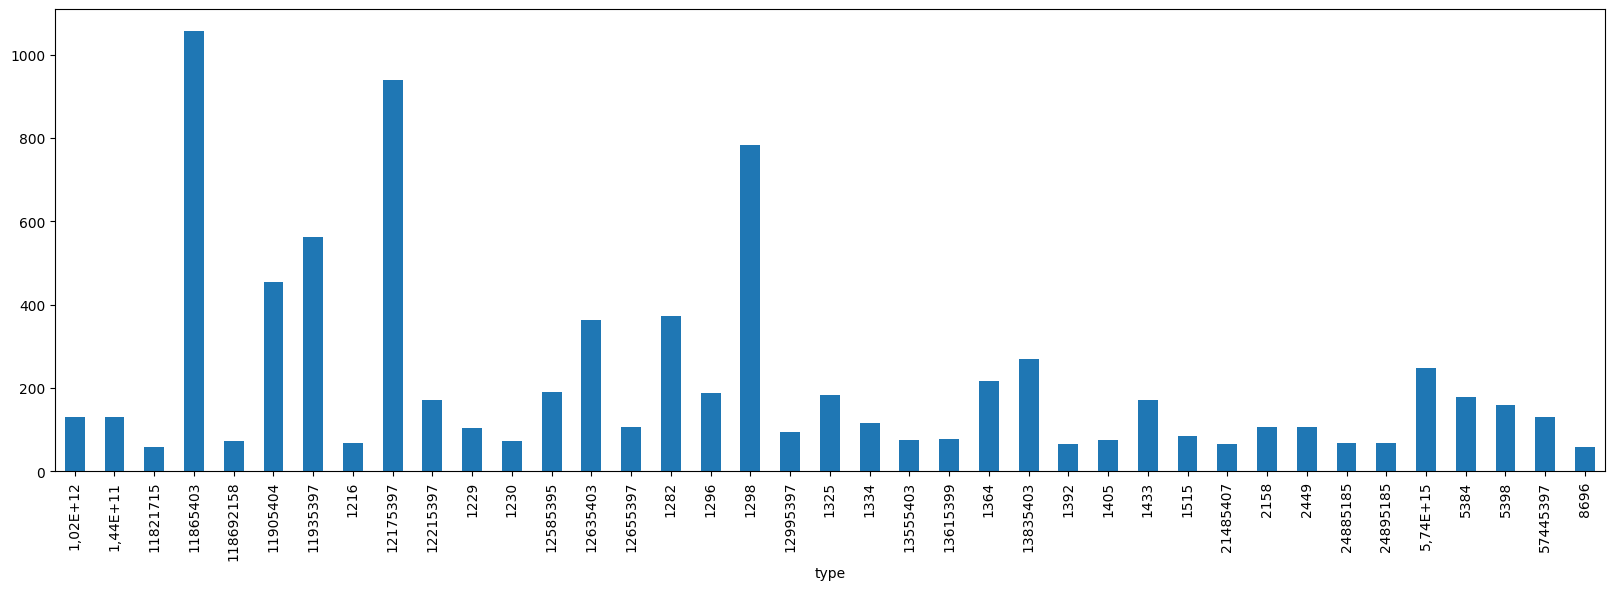

In [130]:
products_per_type = products_df.groupby('type')['sku'].count()

products_per_type.loc[products_per_type > 50].plot.bar(x='type', y='sku', figsize=(20, 6))

<Axes: xlabel='category'>

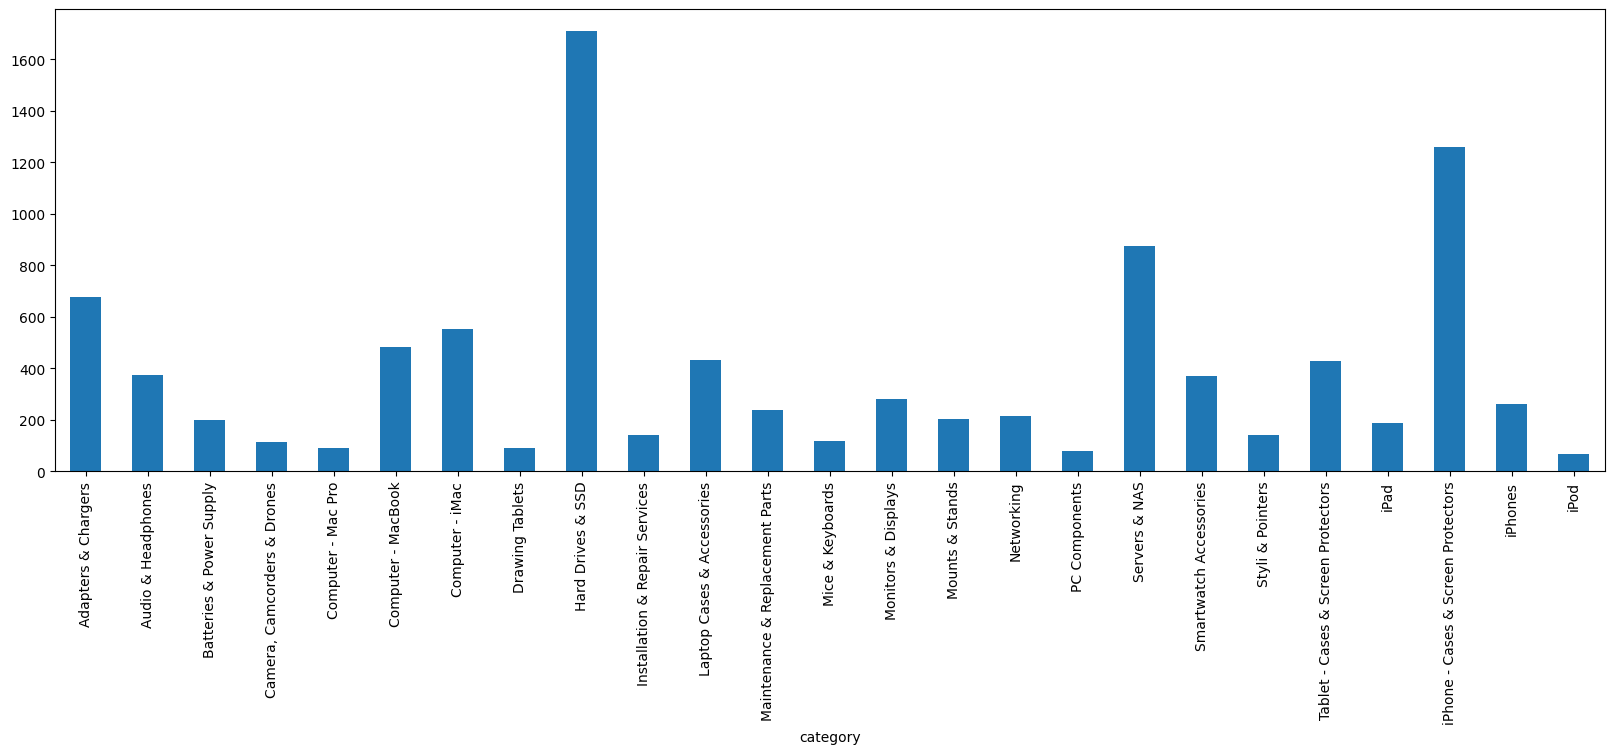

In [131]:
products_per_category = products_df.groupby('category')['sku'].count()

products_per_category.loc[products_per_category > 50].plot.bar(x='type', y='sku', figsize=(20, 6))

What is the distribution of product prices across different categories?

In [132]:
price_per_type = products_df.groupby('type_name')['price'].agg(['mean', 'median', 'min', 'max', 'count'])

<Axes: xlabel='type_name'>

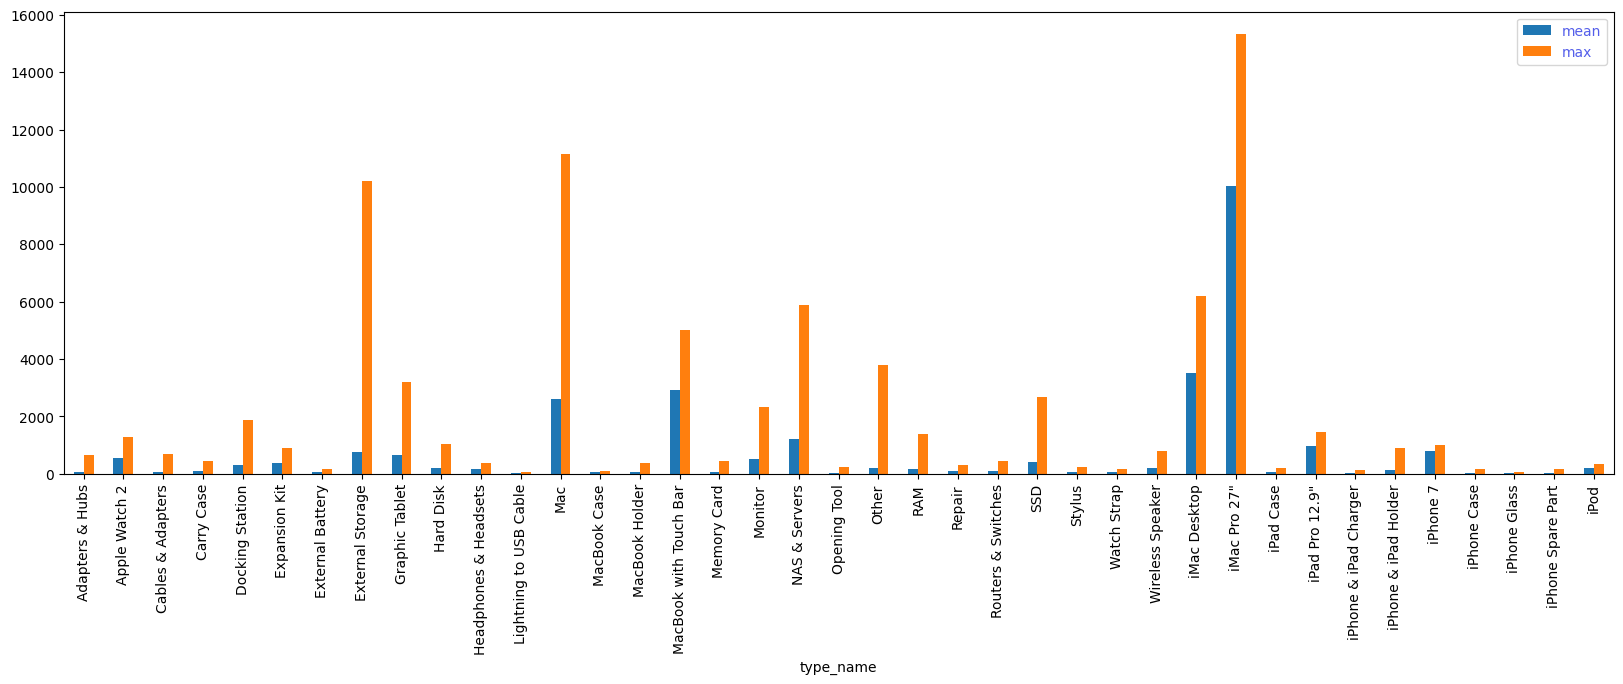

In [133]:
price_per_type.loc[price_per_type['count'] > 50].plot.bar( y=['mean', 'max'], figsize=(20,6))

Text(0.5, 1.0, 'Average and Maximum List Price per category')

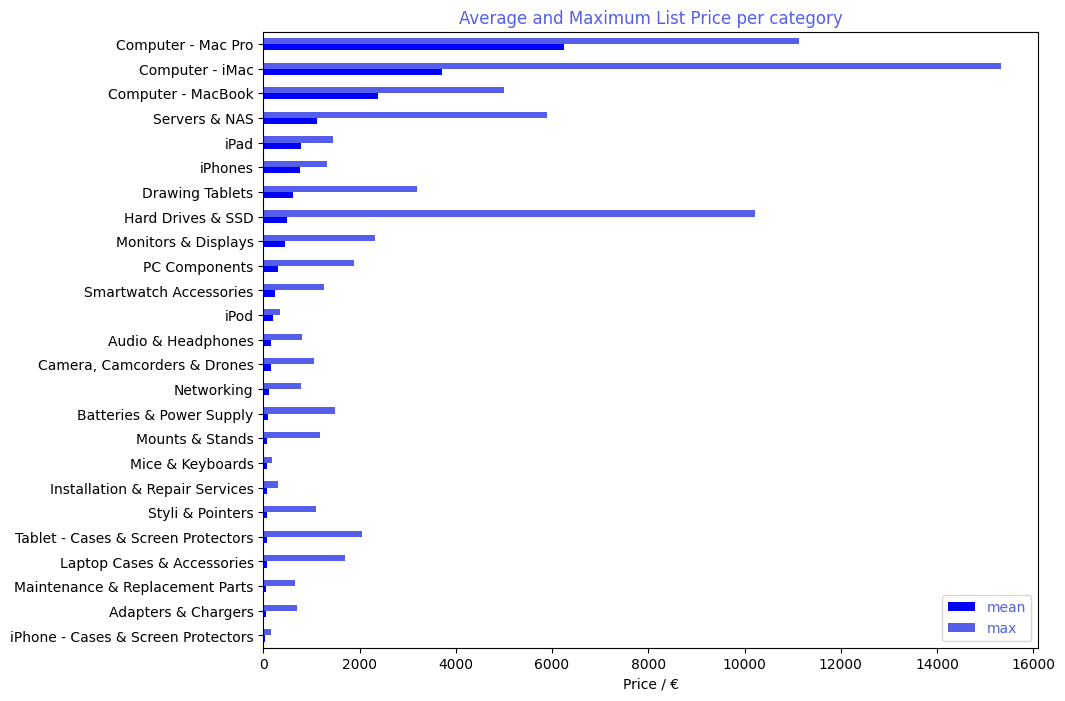

In [264]:
price_per_category = products_df.groupby('category')['price'].agg(['mean', 'median', 'min', 'max', 'count']).sort_values(by='mean')
plt.rcParams['font.size'] = 10
ax = price_per_category.loc[price_per_category['count'] > 50].plot(kind='barh', y=['mean', 'max'], figsize=(10,8), colormap=mcolors.ListedColormap(['Blue', '#545EEA']))
#plt.xticks(rotation=75)
#plt.ylabel('Category')
ax.set(ylabel='')
plt.xlabel('Price / €')
plt.title('Average and Maximum List Price per category')

In [135]:
products_df.loc[:, 'category'].nunique()

44

In [136]:
products_df.groupby('category')['price'].mean().round(2)

,price
category,
Adapters & Chargers,59.44
Apple TV,142.33
AppleCare,165.50
Audio & Headphones,162.93
Batteries & Power Supply,91.68
Bluetooth Trackers,42.93
"Camera, Camcorders & Drones",148.72
Computer - Mac Pro,6245.33
Computer - Mac mini,1298.44


In [137]:
products_df.loc[products_df.loc[:, 'category'] == 'Servers & NAS'].sort_values(by='price', ascending=True)

,sku,name,desc,price,in_stock,type,category,type_name
2921,QNA0160,QNAP 2GB RAM memory DDR3 1600MHz SO-DIMM,2GB RAM memory QNAP NAS.,9.99,1,1404,Servers & NAS,Other
2903,QNA0018,QNAP HDD Tray black NAS System,HDD tray for QNAP NAS system.,11.99,0,1404,Servers & NAS,Other
4805,QNA0166,QNAP RM-IR002 IR remote control,IR remote server NAS,14.99,0,1404,Servers & NAS,Other
2908,QNA0158,"QNAP Security bay Hot-swap 35 ""Black",Bay data security for hot swapping of hard dri...,19.99,0,1404,Servers & NAS,Other
4589,FCM0028,FCM Mac Memory 4GB DDR3 1600MHz SO-DIMM,4GB RAM MacBook Pro (2012) Mac mini / Server (...,32.99,0,1364,Servers & NAS,RAM
...,...,...,...,...,...,...,...,...
4743,SYN0164,Synology RackStation RS4017xs + Nas Server,Nas Format rack 16 bays with Intel Xeon proces...,5389.00,0,12175397,Servers & NAS,NAS & Servers
2857,SYN0165,Synology RackStation RS18017xs + NAS 12 bays S...,Nas Format rack 12 bays with Intel Xeon 6-core...,5499.00,0,12175397,Servers & NAS,NAS & Servers
2722,PAC1791,Synology DS1815 + | 80TB (8x10TB) Seagate Iron...,DS1815 + NAS 80TB capacity Seagate Hard Drive ...,5737.91,0,12175397,Servers & NAS,NAS & Servers
2724,PAC1798,Synology DS1815 + | 8GB RAM | 80TB (8x10TB) Se...,Nas DS1815 + 8GB RAM capacity of 80TB (8x10TB)...,5836.89,0,12175397,Servers & NAS,NAS & Servers


In [138]:
orderlines_df['date'] = pd.to_datetime(orderlines_df.loc[:, 'date'])
orderlines_df = orderlines_df.drop(columns='product_id')

In [139]:
# orders with individual items
orders_in_detail = orders_df.merge(orderlines_df, left_on='order_id', right_on='id_order')
orders_in_detail

,order_id,created_date,total_paid,yearmonth,id,id_order,product_quantity,sku,unit_price,date
0,241423,2017-11-06 13:10:02,136.15,2017-11,1398738,241423,1,LAC0212,129.16,2017-11-06 12:47:20
1,242832,2017-12-31 17:40:03,15.76,2017-12,1529178,242832,1,PAR0074,10.77,2017-12-31 17:26:40
2,243330,2017-02-16 10:59:38,84.98,2017-02,1181923,243330,1,OWC0074,77.99,2017-02-15 17:07:44
3,245275,2017-06-28 11:35:37,149.00,2017-06,1276706,245275,1,TAD0007,149.00,2017-06-28 11:12:30
4,245595,2017-01-21 12:52:47,112.97,2017-01,1154394,245595,2,PAC1561,52.99,2017-01-21 12:49:00
...,...,...,...,...,...,...,...,...,...,...
53226,527042,2018-03-14 11:47:50,18.98,2018-03,1649446,527042,1,APP0927,13.99,2018-03-14 11:42:38
53227,527070,2018-03-14 11:50:48,24.97,2018-03,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01
53228,527074,2018-03-14 11:51:42,24.97,2018-03,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36
53229,527096,2018-03-14 11:58:40,34.96,2018-03,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35


In [140]:
# compute the total price of each order (sum over the total value of all order lines of an order)
orders_in_detail['sum_price'] = orders_in_detail.loc[:, 'product_quantity'] * orders_in_detail.loc[:, 'unit_price']
total_sum_price = orders_in_detail.groupby('order_id')['sum_price'].sum()
total_sum_price_df = pd.DataFrame(total_sum_price).rename(columns={'sum_price': 'total_sum_price'}).reset_index()
orders_in_detail = orders_in_detail.merge(total_sum_price_df, on='order_id')

In [141]:
# What paid the customer in addition to the product value?
orders_in_detail['price_diff'] = - orders_in_detail.loc[:, 'total_sum_price'] + orders_in_detail.loc[:, 'total_paid']

In [142]:
orders_in_detail

,order_id,created_date,total_paid,yearmonth,id,id_order,product_quantity,sku,unit_price,date,sum_price,total_sum_price,price_diff
0,241423,2017-11-06 13:10:02,136.15,2017-11,1398738,241423,1,LAC0212,129.16,2017-11-06 12:47:20,129.16,129.16,6.99
1,242832,2017-12-31 17:40:03,15.76,2017-12,1529178,242832,1,PAR0074,10.77,2017-12-31 17:26:40,10.77,10.77,4.99
2,243330,2017-02-16 10:59:38,84.98,2017-02,1181923,243330,1,OWC0074,77.99,2017-02-15 17:07:44,77.99,77.99,6.99
3,245275,2017-06-28 11:35:37,149.00,2017-06,1276706,245275,1,TAD0007,149.00,2017-06-28 11:12:30,149.00,149.00,0.00
4,245595,2017-01-21 12:52:47,112.97,2017-01,1154394,245595,2,PAC1561,52.99,2017-01-21 12:49:00,105.98,105.98,6.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,527042,2018-03-14 11:47:50,18.98,2018-03,1649446,527042,1,APP0927,13.99,2018-03-14 11:42:38,13.99,13.99,4.99
53227,527070,2018-03-14 11:50:48,24.97,2018-03,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,19.98,19.98,4.99
53228,527074,2018-03-14 11:51:42,24.97,2018-03,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,19.98,19.98,4.99
53229,527096,2018-03-14 11:58:40,34.96,2018-03,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,29.97,29.97,4.99


In [143]:
# get a table with product names etc. and not only an id
orderlines_with_products = orderlines_df.merge(products_df, on='sku')
orderlines_with_products

,id,id_order,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,category,type_name
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,Maintenance & Replacement Parts,Installation Kit
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,5720,Mounts & Stands,iPhone / iPad / iPod Holder
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1,13005399,Adapters & Chargers,MacBook Charger
3,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,0,1298,Hard Drives & SSD,Other
4,1119145,299561,1,PEB0015,142.49,2017-01-01 02:38:50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,0,11905404,Smartwatch Accessories,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,1649447,527035,1,APP0698,9.99,2018-03-14 11:42:41,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,Adapters & Chargers,Lightning to USB Cable
53227,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,Adapters & Chargers,Lightning to USB Cable
53228,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,Adapters & Chargers,Lightning to USB Cable
53229,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,Adapters & Chargers,Lightning to USB Cable


In [144]:
# How much less than the listed price did the customer pay?
orderlines_with_products['discount'] = orderlines_with_products.loc[:, 'price'] - orderlines_with_products.loc[:, 'unit_price']
orderlines_with_products

,id,id_order,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,category,type_name,discount
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,Maintenance & Replacement Parts,Installation Kit,13.50
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,5720,Mounts & Stands,iPhone / iPad / iPod Holder,3.96
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1,13005399,Adapters & Chargers,MacBook Charger,16.81
3,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,0,1298,Hard Drives & SSD,Other,16.09
4,1119145,299561,1,PEB0015,142.49,2017-01-01 02:38:50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,0,11905404,Smartwatch Accessories,Other,157.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,1649447,527035,1,APP0698,9.99,2018-03-14 11:42:41,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,Adapters & Chargers,Lightning to USB Cable,15.01
53227,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,Adapters & Chargers,Lightning to USB Cable,15.01
53228,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,Adapters & Chargers,Lightning to USB Cable,15.01
53229,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,Adapters & Chargers,Lightning to USB Cable,15.01


In [145]:
# How common is a purchase at the listed price?
print(f"{(100*(orderlines_with_products.loc[:, 'discount'] == 0.0).sum() / orderlines_with_products.loc[:, 'discount'].count()).round(2)}% of all ordered items were at the listed price.")

4.24% of all ordered items were at the listed price.


<ipython-input-239-84ec24c99220>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data=orderlines_with_products.agg(lambda x: IsDiscounted(x), axis=1).reset_index(), x=0, stat='percent', discrete=False, palette=cols)


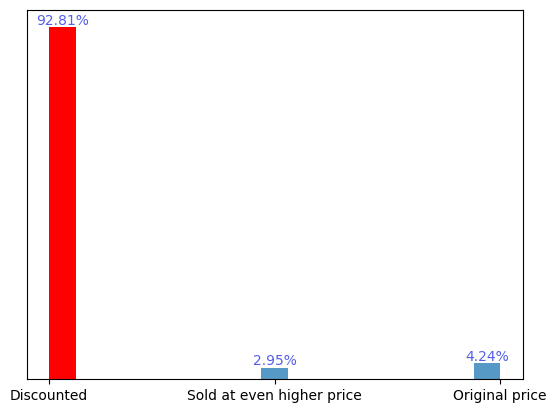

In [239]:
# How many items are discounted?
def IsDiscounted(x):
  if x['discount'] <= -0.01:
    return 'Sold at even higher price'
  elif x['discount'] >= 0.01:
    return 'Discounted'
  else:
    return 'Original price'
orderlines_with_products.agg(lambda x: IsDiscounted(x), axis=1).reset_index()
cols = ['grey' , 'red', 'grey']
ax = sns.histplot(data=orderlines_with_products.agg(lambda x: IsDiscounted(x), axis=1).reset_index(), x=0, stat='percent', discrete=False, palette=cols)
labels = [str(round(v,2))+'%' if v else '' for v in ax.containers[0].datavalues]
ax.bar_label(ax.containers[0], labels=labels)
ax.set(ylabel='')
ax.set(xlabel='')
plt.gca().axes.get_yaxis().set_visible(False)
#plt.xticks(rotation=45)
plt.setp(ax.patches, linewidth=0)
#ax.bar_label(ax.containers[0])
#ax.patches[0].set_facecolor('Red')

In [147]:
# Listed price does not make much sense now. Go for the highest price ...
base_price = orderlines_with_products.groupby('sku')['unit_price'].max().to_frame().reset_index()
base_price

,sku,unit_price
0,8MO0001-A,12.96
1,8MO0003-A,12.85
2,8MO0007,23.99
3,8MO0008,23.99
4,8MO0009,23.99
...,...,...
5093,ZAG0040,26.99
5094,ZAG0041,19.99
5095,ZAG0042,19.99
5096,ZEP0007,125.99


In [148]:
# ... and include it as base price into the table
orderlines_with_products = orderlines_with_products.merge(base_price, on='sku', suffixes=('', '_base'))
orderlines_with_products

,id,id_order,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,category,type_name,discount,unit_price_base
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,Maintenance & Replacement Parts,Installation Kit,13.50,49.99
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,5720,Mounts & Stands,iPhone / iPad / iPod Holder,3.96,19.99
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1,13005399,Adapters & Chargers,MacBook Charger,16.81,75.99
3,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,0,1298,Hard Drives & SSD,Other,16.09,60.90
4,1119145,299561,1,PEB0015,142.49,2017-01-01 02:38:50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,0,11905404,Smartwatch Accessories,Other,157.50,149.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,1649447,527035,1,APP0698,9.99,2018-03-14 11:42:41,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,Adapters & Chargers,Lightning to USB Cable,15.01,14.99
53227,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,Adapters & Chargers,Lightning to USB Cable,15.01,14.99
53228,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,Adapters & Chargers,Lightning to USB Cable,15.01,14.99
53229,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,Adapters & Chargers,Lightning to USB Cable,15.01,14.99


In [149]:
# But sometimes products are sold even for more than the listed price. We don't want to count a sale at the listed price as a discount, so we limit base price at the listed price
def get_base_price(x):
  if x.loc['unit_price_base'] > x.loc['price']:
    return x.loc['price']
  else:
    return x.loc['unit_price_base']

# Now we have a final base price
orderlines_with_products['base_price'] = orderlines_with_products.agg(lambda x: get_base_price(x), axis=1)
orderlines_with_products = orderlines_with_products.drop(columns='unit_price_base')
orderlines_with_products

,id,id_order,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,category,type_name,discount,base_price
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,Maintenance & Replacement Parts,Installation Kit,13.50,49.99
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,5720,Mounts & Stands,iPhone / iPad / iPod Holder,3.96,19.99
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1,13005399,Adapters & Chargers,MacBook Charger,16.81,75.99
3,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,0,1298,Hard Drives & SSD,Other,16.09,60.90
4,1119145,299561,1,PEB0015,142.49,2017-01-01 02:38:50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,0,11905404,Smartwatch Accessories,Other,157.50,149.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,1649447,527035,1,APP0698,9.99,2018-03-14 11:42:41,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,Adapters & Chargers,Lightning to USB Cable,15.01,14.99
53227,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,Adapters & Chargers,Lightning to USB Cable,15.01,14.99
53228,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,Adapters & Chargers,Lightning to USB Cable,15.01,14.99
53229,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,Adapters & Chargers,Lightning to USB Cable,15.01,14.99


In [150]:
# Now compute discounts against base price
orderlines_with_products['discount_against_base_price'] = orderlines_with_products.loc[:, 'base_price'] - orderlines_with_products.loc[:, 'unit_price']
orderlines_with_products

,id,id_order,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,category,type_name,discount,base_price,discount_against_base_price
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,Maintenance & Replacement Parts,Installation Kit,13.50,49.99,2.5
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,5720,Mounts & Stands,iPhone / iPad / iPod Holder,3.96,19.99,1.0
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1,13005399,Adapters & Chargers,MacBook Charger,16.81,75.99,3.8
3,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,0,1298,Hard Drives & SSD,Other,16.09,60.90,0.0
4,1119145,299561,1,PEB0015,142.49,2017-01-01 02:38:50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,0,11905404,Smartwatch Accessories,Other,157.50,149.99,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,1649447,527035,1,APP0698,9.99,2018-03-14 11:42:41,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,Adapters & Chargers,Lightning to USB Cable,15.01,14.99,5.0
53227,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,Adapters & Chargers,Lightning to USB Cable,15.01,14.99,5.0
53228,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,Adapters & Chargers,Lightning to USB Cable,15.01,14.99,5.0
53229,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,Adapters & Chargers,Lightning to USB Cable,15.01,14.99,5.0


In [151]:
# We don't need the in_stock column
orderlines_with_products = orderlines_with_products.drop(columns='in_stock')

In [152]:
# Reorder columns for readability
new_order = ['id', 'id_order', 'sku', 'name', 'desc', 'type', 'type_name', 'category', 'Second_Hand', 'product_quantity', 'date', 'price', 'base_price', 'unit_price', 'discount', 'discount_against_base_price']
orderlines_with_products = orderlines_with_products.reindex(columns=new_order)

In [153]:
orderlines_with_products

,id,id_order,sku,name,desc,type,type_name,category,Second_Hand,product_quantity,date,price,base_price,unit_price,discount,discount_against_base_price
0,1119116,299545,OWC0100,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,12755395,Installation Kit,Maintenance & Replacement Parts,NaN,1,2017-01-01 01:46:16,60.99,49.99,47.49,13.50,2.5
1,1119119,299546,IOT0014,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,5720,iPhone / iPad / iPod Holder,Mounts & Stands,NaN,1,2017-01-01 01:50:34,22.95,19.99,18.99,3.96,1.0
2,1119120,295347,APP0700,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,13005399,MacBook Charger,Adapters & Chargers,NaN,1,2017-01-01 01:54:11,89.00,75.99,72.19,16.81,3.8
3,1119134,299556,CRU0039-A,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,1298,Other,Hard Drives & SSD,NaN,1,2017-01-01 02:20:14,76.99,60.90,60.90,16.09,0.0
4,1119145,299561,PEB0015,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,11905404,Other,Smartwatch Accessories,NaN,1,2017-01-01 02:38:50,299.99,149.99,142.49,157.50,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,1649447,527035,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1230,Lightning to USB Cable,Adapters & Chargers,NaN,1,2018-03-14 11:42:41,25.00,14.99,9.99,15.01,5.0
53227,1649512,527070,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1230,Lightning to USB Cable,Adapters & Chargers,NaN,2,2018-03-14 11:49:01,25.00,14.99,9.99,15.01,5.0
53228,1649522,527074,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1230,Lightning to USB Cable,Adapters & Chargers,NaN,2,2018-03-14 11:49:36,25.00,14.99,9.99,15.01,5.0
53229,1649565,527096,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1230,Lightning to USB Cable,Adapters & Chargers,NaN,3,2018-03-14 11:54:35,25.00,14.99,9.99,15.01,5.0


In [154]:
# Now compute the relative discount in %
orderlines_with_products['discount_base_percent'] = 100 * orderlines_with_products.loc[:, 'discount_against_base_price'] / orderlines_with_products.loc[:, 'base_price']
orderlines_with_products = orderlines_with_products.loc[: 'discount_base_percent'].round(2)
orderlines_with_products

,id,id_order,sku,name,desc,type,type_name,category,Second_Hand,product_quantity,date,price,base_price,unit_price,discount,discount_against_base_price,discount_base_percent
0,1119116,299545,OWC0100,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,12755395,Installation Kit,Maintenance & Replacement Parts,NaN,1,2017-01-01 01:46:16,60.99,49.99,47.49,13.50,2.5,5.00
1,1119119,299546,IOT0014,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,5720,iPhone / iPad / iPod Holder,Mounts & Stands,NaN,1,2017-01-01 01:50:34,22.95,19.99,18.99,3.96,1.0,5.00
2,1119120,295347,APP0700,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,13005399,MacBook Charger,Adapters & Chargers,NaN,1,2017-01-01 01:54:11,89.00,75.99,72.19,16.81,3.8,5.00
3,1119134,299556,CRU0039-A,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,1298,Other,Hard Drives & SSD,NaN,1,2017-01-01 02:20:14,76.99,60.90,60.90,16.09,0.0,0.00
4,1119145,299561,PEB0015,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,11905404,Other,Smartwatch Accessories,NaN,1,2017-01-01 02:38:50,299.99,149.99,142.49,157.50,7.5,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,1649447,527035,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1230,Lightning to USB Cable,Adapters & Chargers,NaN,1,2018-03-14 11:42:41,25.00,14.99,9.99,15.01,5.0,33.36
53227,1649512,527070,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1230,Lightning to USB Cable,Adapters & Chargers,NaN,2,2018-03-14 11:49:01,25.00,14.99,9.99,15.01,5.0,33.36
53228,1649522,527074,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1230,Lightning to USB Cable,Adapters & Chargers,NaN,2,2018-03-14 11:49:36,25.00,14.99,9.99,15.01,5.0,33.36
53229,1649565,527096,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1230,Lightning to USB Cable,Adapters & Chargers,NaN,3,2018-03-14 11:54:35,25.00,14.99,9.99,15.01,5.0,33.36


In [155]:
# To get statistically meaningful data, we should only deal with products that have been sold often (let's more than 15 times, but that is arbitrarily)
total_quantity = orderlines_with_products.groupby('sku')['product_quantity'].sum()
popular_products = total_quantity.loc[total_quantity > 15].index
popular_products.shape

(860,)

In [156]:
# Now let's count how often a prodcut was sold at which discount (keep type and base price to faciliate further data handling)
rebate_and_quantity = orderlines_with_products[orderlines_with_products.loc[:, 'sku'].isin(popular_products)].groupby(['sku', 'base_price', 'type', 'discount_base_percent'])['product_quantity'].sum().reset_index()
rebate_and_quantity

,sku,base_price,type,discount_base_percent,product_quantity
0,ADN0042,74.99,1229,0.00,13
1,ADN0042,74.99,1229,2.67,5
2,ADN0042,74.99,1229,5.00,2
3,ADN0042,74.99,1229,6.67,2
4,ADN0042,74.99,1229,15.00,5
...,...,...,...,...,...
5693,ZAG0036,19.99,5384,0.00,15
5694,ZAG0036,19.99,5384,15.01,6
5695,ZAG0036,19.99,5384,40.02,63
5696,ZAG0037,9.99,12635403,0.00,20


In [157]:
# At wich discount were most of the sales?
most_purchased = rebate_and_quantity.groupby('sku')['product_quantity'].max()
most_purchased.to_frame().reset_index()

,sku,product_quantity
0,ADN0042,13
1,ADN0046,18
2,AKI0025,25
3,ALL0007,20
4,ALL0008,23
...,...,...
855,ZAG0032,171
856,ZAG0034,22
857,ZAG0035,11
858,ZAG0036,63


In [158]:
# remerge that info in our table
rebate_and_quantity = rebate_and_quantity.merge(most_purchased.to_frame().reset_index(), on='sku', suffixes=('', '_most'))
rebate_and_quantity

,sku,base_price,type,discount_base_percent,product_quantity,product_quantity_most
0,ADN0042,74.99,1229,0.00,13,13
1,ADN0042,74.99,1229,2.67,5,13
2,ADN0042,74.99,1229,5.00,2,13
3,ADN0042,74.99,1229,6.67,2,13
4,ADN0042,74.99,1229,15.00,5,13
...,...,...,...,...,...,...
5693,ZAG0036,19.99,5384,0.00,15,63
5694,ZAG0036,19.99,5384,15.01,6,63
5695,ZAG0036,19.99,5384,40.02,63,63
5696,ZAG0037,9.99,12635403,0.00,20,20


<Axes: title={'center': 'Products with given base price where purchased most when discount was at'}, xlabel='base_price', ylabel='discount_base_percent'>

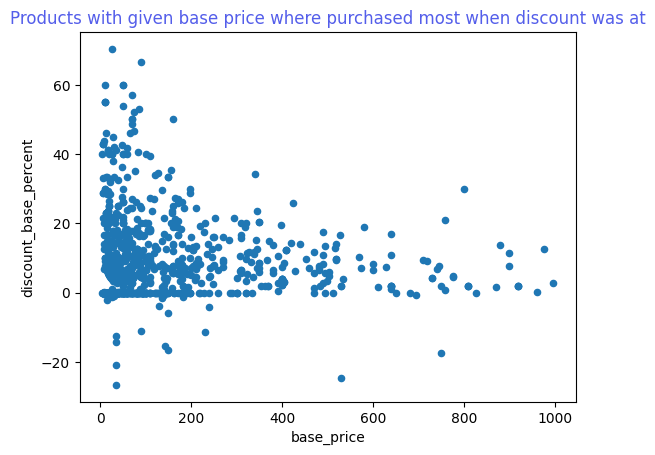

In [159]:
# Let's look whether the customer have a preference for discounts at a given base price
rebate_and_quantity.loc[rebate_and_quantity.loc[:, 'product_quantity'] == rebate_and_quantity.loc[:, 'product_quantity_most']].plot.scatter(x='base_price', y='discount_base_percent', title='Products with given base price where purchased most when discount was at')

Honestly, there's nt much to see ...

Does revenue grow whenever discounts increase?

In [160]:
# Add some pricing data
orderlines_with_products['total_price'] = orderlines_with_products.loc[:, 'product_quantity'] * orderlines_with_products.loc[:, 'unit_price']
orderlines_with_products['discount_percentage'] = 100 * orderlines_with_products.loc[:, 'discount'] / orderlines_with_products.loc[:, 'price']
orderlines_with_products['discount_percentage'] = orderlines_with_products.loc[:, 'discount_percentage'].round(2)
orderlines_with_products

,id,id_order,sku,name,desc,type,type_name,category,Second_Hand,product_quantity,date,price,base_price,unit_price,discount,discount_against_base_price,discount_base_percent,total_price,discount_percentage
0,1119116,299545,OWC0100,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,12755395,Installation Kit,Maintenance & Replacement Parts,NaN,1,2017-01-01 01:46:16,60.99,49.99,47.49,13.50,2.5,5.00,47.49,22.13
1,1119119,299546,IOT0014,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,5720,iPhone / iPad / iPod Holder,Mounts & Stands,NaN,1,2017-01-01 01:50:34,22.95,19.99,18.99,3.96,1.0,5.00,18.99,17.25
2,1119120,295347,APP0700,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,13005399,MacBook Charger,Adapters & Chargers,NaN,1,2017-01-01 01:54:11,89.00,75.99,72.19,16.81,3.8,5.00,72.19,18.89
3,1119134,299556,CRU0039-A,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,1298,Other,Hard Drives & SSD,NaN,1,2017-01-01 02:20:14,76.99,60.90,60.90,16.09,0.0,0.00,60.90,20.90
4,1119145,299561,PEB0015,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,11905404,Other,Smartwatch Accessories,NaN,1,2017-01-01 02:38:50,299.99,149.99,142.49,157.50,7.5,5.00,142.49,52.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,1649447,527035,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1230,Lightning to USB Cable,Adapters & Chargers,NaN,1,2018-03-14 11:42:41,25.00,14.99,9.99,15.01,5.0,33.36,9.99,60.04
53227,1649512,527070,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1230,Lightning to USB Cable,Adapters & Chargers,NaN,2,2018-03-14 11:49:01,25.00,14.99,9.99,15.01,5.0,33.36,19.98,60.04
53228,1649522,527074,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1230,Lightning to USB Cable,Adapters & Chargers,NaN,2,2018-03-14 11:49:36,25.00,14.99,9.99,15.01,5.0,33.36,19.98,60.04
53229,1649565,527096,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1230,Lightning to USB Cable,Adapters & Chargers,NaN,3,2018-03-14 11:54:35,25.00,14.99,9.99,15.01,5.0,33.36,29.97,60.04


default values: font.size=10.0


Text(-0.3, 90, '21.38%')

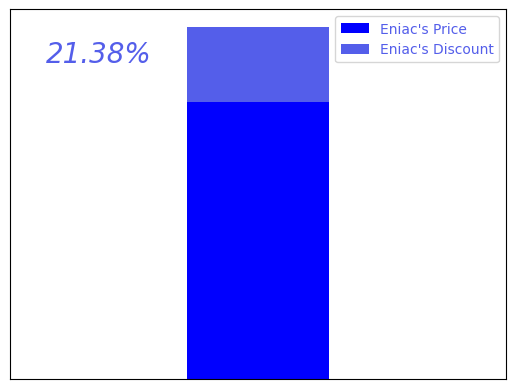

In [161]:
from matplotlib import colors as mcolors
print(f"default values: font.size={plt.rcParams['font.size']}")
avg_discount = orderlines_with_products.loc[:, 'discount_percentage'].mean().round(2)
vis_discount = pd.Series([100 -avg_discount, avg_discount])
g = vis_discount.to_frame().T.plot(kind='bar', stacked=True, colormap=mcolors.ListedColormap(['Blue', '#545EEA']), width=0.20)
#g.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, labels=["Eniac's Price", "Eniac's Discount"])
g.legend(labels=["Eniac's Price", "Eniac's Discount"])

g.set(ylabel='')
g.set(xlabel='')
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.rcParams['text.color'] = '#545EEA'
plt.rcParams['font.size'] = 20
g.text(-0.3, 90, str(avg_discount)+'%', style='italic', bbox={
        'fill': False, 'lw': 0, 'facecolor': 'Red'})

Text(-0.3, 250000, '18.11%')

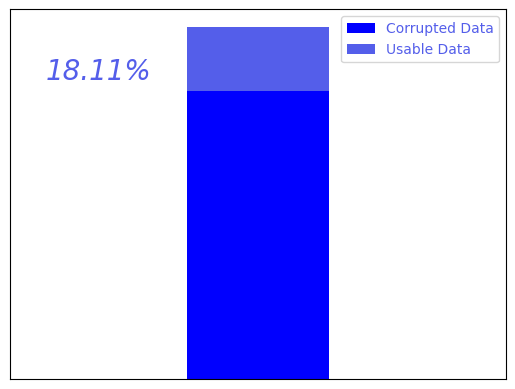

In [162]:
original_orderlines = 293983
useable = round(100*orderlines_df.shape[0]/original_orderlines, 2)
vis_corrupted_data = pd.Series([original_orderlines - orderlines_df.shape[0], orderlines_df.shape[0]])
plt.rcParams['font.size'] = 10
g = vis_corrupted_data.to_frame().T.plot(kind='bar', stacked=True, colormap=mcolors.ListedColormap(['Blue', '#545EEA']), width=0.20)
#g.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, labels=["Eniac's Price", "Eniac's Discount"])
g.legend(labels=["Corrupted Data", "Usable Data"])

g.set(ylabel='')
g.set(xlabel='')
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.rcParams['text.color'] = '#545EEA'
plt.rcParams['font.size'] = 20
g.text(-0.3, 250000, str(useable)+'%', style='italic', bbox={
        'fill': False, 'lw': 0})

In [163]:
plt.rcParams['font.size'] = 10

In [164]:
orderlines_df.shape

(53231, 6)

In [165]:
# Reorder for better readability
neworder = ['id', 'id_order', 'sku', 'name', 'desc', 'type', 'type_name', 'category', 'Second_Hand', 'product_quantity',
       'date', 'price', 'base_price', 'unit_price', 'total_price', 'discount', 'discount_percentage',
       'discount_against_base_price', 'discount_base_percent'
       ]
orderlines_with_products = orderlines_with_products.reindex(columns=neworder)
orderlines_with_products.head()

,id,id_order,sku,name,desc,type,type_name,category,Second_Hand,product_quantity,date,price,base_price,unit_price,total_price,discount,discount_percentage,discount_against_base_price,discount_base_percent
0,1119116,299545,OWC0100,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,12755395,Installation Kit,Maintenance & Replacement Parts,NaN,1,2017-01-01 01:46:16,60.99,49.99,47.49,47.49,13.50,22.13,2.5,5.0
1,1119119,299546,IOT0014,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,5720,iPhone / iPad / iPod Holder,Mounts & Stands,NaN,1,2017-01-01 01:50:34,22.95,19.99,18.99,18.99,3.96,17.25,1.0,5.0
2,1119120,295347,APP0700,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,13005399,MacBook Charger,Adapters & Chargers,NaN,1,2017-01-01 01:54:11,89.00,75.99,72.19,72.19,16.81,18.89,3.8,5.0
3,1119134,299556,CRU0039-A,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,1298,Other,Hard Drives & SSD,NaN,1,2017-01-01 02:20:14,76.99,60.90,60.90,60.90,16.09,20.90,0.0,0.0
4,1119145,299561,PEB0015,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,11905404,Other,Smartwatch Accessories,NaN,1,2017-01-01 02:38:50,299.99,149.99,142.49,142.49,157.50,52.50,7.5,5.0


In [166]:
# What is the average discount (against listed price)
orderlines_with_products.loc[:, 'discount_percentage'].mean().round(2)

np.float64(21.38)

In [167]:
# What is the average discount (against base price)
orderlines_with_products.loc[:, 'discount_base_percent'].mean().round(2)

np.float64(9.6)

In [168]:
# Add the total revenue of a product
total_revenue = orderlines_with_products.groupby('sku')['total_price'].sum()
orderlines_with_products = orderlines_with_products.merge(total_revenue.to_frame().reset_index(), on='sku', suffixes=('', '_rev')).rename(columns={'total_price_rev': 'total_revenue'})
orderlines_with_products

,id,id_order,sku,name,desc,type,type_name,category,Second_Hand,product_quantity,date,price,base_price,unit_price,total_price,discount,discount_percentage,discount_against_base_price,discount_base_percent,total_revenue
0,1119116,299545,OWC0100,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,12755395,Installation Kit,Maintenance & Replacement Parts,NaN,1,2017-01-01 01:46:16,60.99,49.99,47.49,47.49,13.50,22.13,2.5,5.00,6599.98
1,1119119,299546,IOT0014,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,5720,iPhone / iPad / iPod Holder,Mounts & Stands,NaN,1,2017-01-01 01:50:34,22.95,19.99,18.99,18.99,3.96,17.25,1.0,5.00,228.87
2,1119120,295347,APP0700,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,13005399,MacBook Charger,Adapters & Chargers,NaN,1,2017-01-01 01:54:11,89.00,75.99,72.19,72.19,16.81,18.89,3.8,5.00,2585.82
3,1119134,299556,CRU0039-A,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,1298,Other,Hard Drives & SSD,NaN,1,2017-01-01 02:20:14,76.99,60.90,60.90,60.90,16.09,20.90,0.0,0.00,60.90
4,1119145,299561,PEB0015,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,11905404,Other,Smartwatch Accessories,NaN,1,2017-01-01 02:38:50,299.99,149.99,142.49,142.49,157.50,52.50,7.5,5.00,3554.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,1649447,527035,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1230,Lightning to USB Cable,Adapters & Chargers,NaN,1,2018-03-14 11:42:41,25.00,14.99,9.99,9.99,15.01,60.04,5.0,33.36,8181.84
53227,1649512,527070,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1230,Lightning to USB Cable,Adapters & Chargers,NaN,2,2018-03-14 11:49:01,25.00,14.99,9.99,19.98,15.01,60.04,5.0,33.36,8181.84
53228,1649522,527074,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1230,Lightning to USB Cable,Adapters & Chargers,NaN,2,2018-03-14 11:49:36,25.00,14.99,9.99,19.98,15.01,60.04,5.0,33.36,8181.84
53229,1649565,527096,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1230,Lightning to USB Cable,Adapters & Chargers,NaN,3,2018-03-14 11:54:35,25.00,14.99,9.99,29.97,15.01,60.04,5.0,33.36,8181.84


In [169]:
# Now only keep the popular products
# Now we group by sku and discount and sum up the revenue for each discount rate
# Base prase and listed price are unique for each product; therefore both discounts define the same grouping
# Also keep type for further data handling
discounts_table = orderlines_with_products[orderlines_with_products.loc[:, 'sku'].isin(popular_products)].groupby(['sku', 'type', 'discount_percentage', 'discount_base_percent']).agg({'total_price': 'sum', 'product_quantity': 'sum', 'total_revenue': 'max'}).reset_index()

In [170]:
discounts_table

,sku,type,discount_percentage,discount_base_percent,total_price,product_quantity,total_revenue
0,ADN0042,1229,0.00,0.00,974.87,13,1940.98
1,ADN0042,1229,2.67,2.67,364.95,5,1940.98
2,ADN0042,1229,5.00,5.00,142.48,2,1940.98
3,ADN0042,1229,6.67,6.67,139.98,2,1940.98
4,ADN0042,1229,15.00,15.00,318.70,5,1940.98
...,...,...,...,...,...,...,...
5705,ZAG0036,5384,33.34,0.00,299.85,15,1157.16
5706,ZAG0036,5384,43.35,15.01,101.94,6,1157.16
5707,ZAG0036,5384,60.02,40.02,755.37,63,1157.16
5708,ZAG0037,12635403,66.69,0.00,199.80,20,229.74


In [171]:
# Now compute the share of each discount to the total revenue of a product; round to 2 decimals
discounts_table['percentage_of_total_revenue'] = 100 * discounts_table.loc[:, 'total_price'] / discounts_table.loc[:, 'total_revenue']
discounts_table['percentage_of_total_revenue'] = discounts_table.loc[:, 'percentage_of_total_revenue'].round(2)
discounts_table

,sku,type,discount_percentage,discount_base_percent,total_price,product_quantity,total_revenue,percentage_of_total_revenue
0,ADN0042,1229,0.00,0.00,974.87,13,1940.98,50.23
1,ADN0042,1229,2.67,2.67,364.95,5,1940.98,18.80
2,ADN0042,1229,5.00,5.00,142.48,2,1940.98,7.34
3,ADN0042,1229,6.67,6.67,139.98,2,1940.98,7.21
4,ADN0042,1229,15.00,15.00,318.70,5,1940.98,16.42
...,...,...,...,...,...,...,...,...
5705,ZAG0036,5384,33.34,0.00,299.85,15,1157.16,25.91
5706,ZAG0036,5384,43.35,15.01,101.94,6,1157.16,8.81
5707,ZAG0036,5384,60.02,40.02,755.37,63,1157.16,65.28
5708,ZAG0037,12635403,66.69,0.00,199.80,20,229.74,86.97


<Axes: xlabel='discount_percentage', ylabel='percentage_of_total_revenue'>

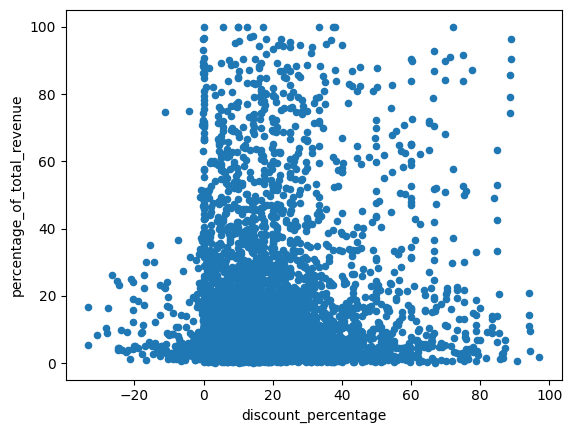

In [172]:
# Now some plottings
discounts_table.plot.scatter(x='discount_percentage', y='percentage_of_total_revenue')

<Axes: xlabel='discount_base_percent', ylabel='percentage_of_total_revenue'>

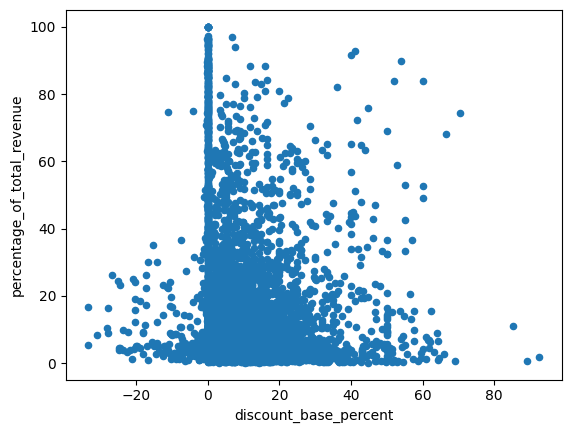

In [173]:
discounts_table.plot.scatter(x='discount_base_percent', y='percentage_of_total_revenue')

In [174]:
# Now we go an level up and look on types
# We make secundar grouping based on the discount rate
# I. e. we take all products of a given type and a given discount rate
types_and_revenue = orderlines_with_products.loc[orderlines_with_products.loc[:, 'sku'].isin(popular_products)].groupby(['type', 'discount_percentage', 'discount_base_percent']).agg({'unit_price': 'sum'}).reset_index()
types_and_revenue

,type,discount_percentage,discount_base_percent,unit_price
0,"1,44E+11",-33.34,-33.34,359.97
1,"1,44E+11",-11.11,-11.11,1599.84
2,"1,44E+11",0.00,0.00,179.98
3,10142,11.07,0.00,559.93
4,10142,11.77,0.79,79.36
...,...,...,...,...
4915,9094,60.36,9.09,3689.59
4916,9094,61.15,10.91,88.19
4917,9094,61.24,11.11,351.96
4918,9094,61.68,12.12,347.96


In [175]:
# Add the total revenue of each type
total_revenue_per_type = types_and_revenue.groupby('type')['unit_price'].sum()
types_and_revenue = types_and_revenue.merge(total_revenue_per_type.to_frame().reset_index(), on='type')
types_and_revenue

,type,discount_percentage,discount_base_percent,unit_price_x,unit_price_y
0,"1,44E+11",-33.34,-33.34,359.97,2139.79
1,"1,44E+11",-11.11,-11.11,1599.84,2139.79
2,"1,44E+11",0.00,0.00,179.98,2139.79
3,10142,11.07,0.00,559.93,66837.41
4,10142,11.77,0.79,79.36,66837.41
...,...,...,...,...,...
4915,9094,60.36,9.09,3689.59,15782.20
4916,9094,61.15,10.91,88.19,15782.20
4917,9094,61.24,11.11,351.96,15782.20
4918,9094,61.68,12.12,347.96,15782.20


In [176]:
# We compute the share of each discount rate
types_and_revenue['percentage_of_revenue'] = 100 * types_and_revenue.loc[:, 'unit_price_x'] / types_and_revenue.loc[:, 'unit_price_y']
types_and_revenue['percentage_of_revenue'] = types_and_revenue.loc[:, 'percentage_of_revenue'].round(2)
types_and_revenue

,type,discount_percentage,discount_base_percent,unit_price_x,unit_price_y,percentage_of_revenue
0,"1,44E+11",-33.34,-33.34,359.97,2139.79,16.82
1,"1,44E+11",-11.11,-11.11,1599.84,2139.79,74.77
2,"1,44E+11",0.00,0.00,179.98,2139.79,8.41
3,10142,11.07,0.00,559.93,66837.41,0.84
4,10142,11.77,0.79,79.36,66837.41,0.12
...,...,...,...,...,...,...
4915,9094,60.36,9.09,3689.59,15782.20,23.38
4916,9094,61.15,10.91,88.19,15782.20,0.56
4917,9094,61.24,11.11,351.96,15782.20,2.23
4918,9094,61.68,12.12,347.96,15782.20,2.20


In [177]:
# Some more meaningful column names
types_and_revenue = types_and_revenue.rename(columns={'unit_price_x': 'revenue_per_discount', 'unit_price_y': 'total_revenue'})
types_and_revenue

,type,discount_percentage,discount_base_percent,revenue_per_discount,total_revenue,percentage_of_revenue
0,"1,44E+11",-33.34,-33.34,359.97,2139.79,16.82
1,"1,44E+11",-11.11,-11.11,1599.84,2139.79,74.77
2,"1,44E+11",0.00,0.00,179.98,2139.79,8.41
3,10142,11.07,0.00,559.93,66837.41,0.84
4,10142,11.77,0.79,79.36,66837.41,0.12
...,...,...,...,...,...,...
4915,9094,60.36,9.09,3689.59,15782.20,23.38
4916,9094,61.15,10.91,88.19,15782.20,0.56
4917,9094,61.24,11.11,351.96,15782.20,2.23
4918,9094,61.68,12.12,347.96,15782.20,2.20


<Axes: xlabel='discount_percentage', ylabel='percentage_of_revenue'>

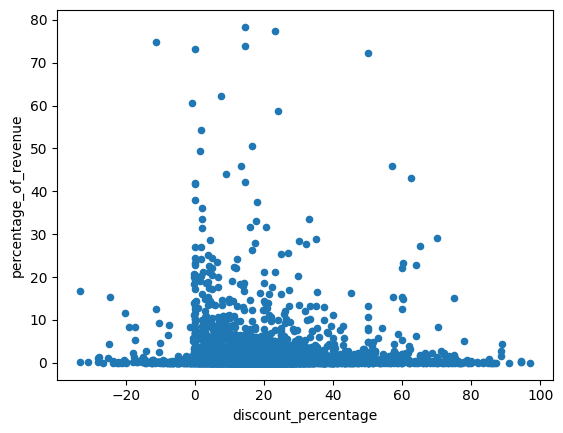

In [178]:
# And some plotting
types_and_revenue.plot.scatter(x='discount_percentage', y='percentage_of_revenue')

The share on the revenue seems to drop when discount is increasing (no surprise there). But there seem to be exceptions ...

In [179]:
# Let's pick the types which have pointsi n the upper right corner (the borders are arbitrarily)
# They could be candidates for products where a discount promotes sales
candidates = types_and_revenue.loc[(types_and_revenue.loc[:, 'discount_percentage']>40) & (types_and_revenue.loc[:, 'percentage_of_revenue']>10), 'type'].unique()
candidates

array(['1230', '12575403', '12755395', '1392', '14035403', '1515',
       '24215399', '2425', '5,49E+11', '5403', '9094'], dtype=object)

In [180]:
# Now compute the cumulative revenue per discount, i. e. revenue at a given discount or lower
# Drop columns that shouldn't have been summed up
cum_per_rev = types_and_revenue.groupby(['type', 'discount_base_percent']).sum().groupby(level=0).cumsum().reset_index()
cum_per_rev.loc[:, ['type', 'discount_base_percent', 'percentage_of_revenue']]
cum_per_rev = cum_per_rev.drop(columns=['discount_percentage', 'revenue_per_discount', 'total_revenue'])
cum_per_rev

,type,discount_base_percent,percentage_of_revenue
0,"1,44E+11",-33.34,16.82
1,"1,44E+11",-11.11,91.59
2,"1,44E+11",0.00,100.00
3,10142,0.00,48.44
4,10142,0.79,48.56
...,...,...,...
3869,9094,12.97,85.75
3870,9094,13.64,89.00
3871,9094,20.00,89.55
3872,9094,22.28,94.30


In [181]:
# Now we select for each type, the row where 50 % are reached and 75%
# pd.cut(...) will assign to each row an intervall (a, b], such that percentage_of revenue is in this intervall
# We take the left end (a) of the intervall and look for our respective threshold
fifty_mask = pd.cut(cum_per_rev.loc[:, 'percentage_of_revenue'], [0, 50, 100]).apply(lambda x: x.left) == 50
seventy_five_mask = pd.cut(cum_per_rev.loc[:, 'percentage_of_revenue'], [0, 75, 100]).apply(lambda x: x.left) == 75

In [182]:
# First we keep only those rows, that have reach the threshold and take the minimal discount, i. e. the smallest discount for which threshold is reached.
# Then we remerge this discount rate into our table
cum_per_rev = cum_per_rev.merge(cum_per_rev.loc[fifty_mask].groupby('type')['discount_base_percent'].min().to_frame().reset_index(), on='type', how='left', suffixes=('', '_50')).rename(columns={'discount_base_percent_50': 'max_discount_0.5_total_revenue'})
cum_per_rev = cum_per_rev.merge(cum_per_rev.loc[seventy_five_mask].groupby('type')['discount_base_percent'].min().to_frame().reset_index(), on='type', how='left', suffixes=('', '_75')).rename(columns={'discount_base_percent_75': 'max_discount_0.75_total_revenue'})
cum_per_rev

,type,discount_base_percent,percentage_of_revenue,max_discount_0.5_total_revenue,max_discount_0.75_total_revenue
0,"1,44E+11",-33.34,16.82,-11.11,-11.11
1,"1,44E+11",-11.11,91.59,-11.11,-11.11
2,"1,44E+11",0.00,100.00,-11.11,-11.11
3,10142,0.00,48.44,2.76,8.75
4,10142,0.79,48.56,2.76,8.75
...,...,...,...,...,...
3869,9094,12.97,85.75,9.09,11.11
3870,9094,13.64,89.00,9.09,11.11
3871,9094,20.00,89.55,9.09,11.11
3872,9094,22.28,94.30,9.09,11.11


In [183]:
# Now compute difference between the discount rate at 50% and at 75%
cum_per_rev['discount_range'] = cum_per_rev.loc[:, 'max_discount_0.75_total_revenue'] - cum_per_rev.loc[:, 'max_discount_0.5_total_revenue']
cum_per_rev

,type,discount_base_percent,percentage_of_revenue,max_discount_0.5_total_revenue,max_discount_0.75_total_revenue,discount_range
0,"1,44E+11",-33.34,16.82,-11.11,-11.11,0.00
1,"1,44E+11",-11.11,91.59,-11.11,-11.11,0.00
2,"1,44E+11",0.00,100.00,-11.11,-11.11,0.00
3,10142,0.00,48.44,2.76,8.75,5.99
4,10142,0.79,48.56,2.76,8.75,5.99
...,...,...,...,...,...,...
3869,9094,12.97,85.75,9.09,11.11,2.02
3870,9094,13.64,89.00,9.09,11.11,2.02
3871,9094,20.00,89.55,9.09,11.11,2.02
3872,9094,22.28,94.30,9.09,11.11,2.02


In [184]:
# We only need type, max_discount_0.5_total_revenue, max_discount_0.75_total_revenue and discount_range
discounts = cum_per_rev.groupby('type')[['max_discount_0.5_total_revenue', 'max_discount_0.75_total_revenue', 'discount_range']].max()

In [185]:
discounts

,max_discount_0.5_total_revenue,max_discount_0.75_total_revenue,discount_range
type,,,
"1,44E+11",-11.11,-11.11,0.00
10142,2.76,8.75,5.99
101781405,0.00,0.00,0.00
10230,0.00,0.00,0.00
106431714,4.12,5.95,1.83
...,...,...,...
57445397,1.10,3.69,2.59
85641716,1.83,2.03,0.20
85651716,13.65,13.65,0.00


In [186]:
# Only keep candidates where the difference is more than 5 percentage points, i. e.
# types where lowering discount by 5 percentage points will generate at least half of the revenue already generated
# If less customers are mostly buying at higher prices
candidates_table = discounts.loc[discounts.loc[:, 'discount_range']>5]
candidates_table

,max_discount_0.5_total_revenue,max_discount_0.75_total_revenue,discount_range
type,,,
10142,2.76,8.75,5.99
11865403,7.69,14.29,6.60
11905404,10.94,19.72,8.78
11935397,9.50,15.09,5.59
12085400,0.56,18.76,18.20
12215397,6.15,12.53,6.38
1229,1.96,11.67,9.71
1230,15.01,33.36,18.35
12575403,55.56,66.67,11.11


In [187]:
candidates_table = candidates_table.reset_index()
candidates_table

,type,max_discount_0.5_total_revenue,max_discount_0.75_total_revenue,discount_range
0,10142,2.76,8.75,5.99
1,11865403,7.69,14.29,6.60
2,11905404,10.94,19.72,8.78
3,11935397,9.50,15.09,5.59
4,12085400,0.56,18.76,18.20
5,12215397,6.15,12.53,6.38
6,1229,1.96,11.67,9.71
7,1230,15.01,33.36,18.35
8,12575403,55.56,66.67,11.11
9,12585395,4.45,10.00,5.55


In [188]:
# Get type names for convenience
candidates_table = candidates_table.merge(products_df.loc[:, ['type', 'type_name']], on='type', how='left').drop_duplicates().set_index('type')
candidates_table

,max_discount_0.5_total_revenue,max_discount_0.75_total_revenue,discount_range,type_name
type,,,,
10142,2.76,8.75,5.99,Internal Battery
11865403,7.69,14.29,6.60,iPhone Case
11905404,10.94,19.72,8.78,Other
11935397,9.50,15.09,5.59,External Storage
12085400,0.56,18.76,18.20,Cleaning Spray
12215397,6.15,12.53,6.38,SSD
1229,1.96,11.67,9.71,Stylus
1230,15.01,33.36,18.35,Lightning to USB Cable
12575403,55.56,66.67,11.11,iPad Case


In [189]:
# Just the type numbers
candidates_list = candidates_table.index
candidates_list

Index(['10142', '11865403', '11905404', '11935397', '12085400', '12215397',
       '1229', '1230', '12575403', '12585395', '12645406', '12655397', '1334',
       '13555403', '13615399', '1364', '13835403', '13855401', '1392', '1405',
       '1515', '21485407', '24215399', '2425', '2449', '42945397', '5398',
       '5403', '5407', '5720', '8696'],
      dtype='object', name='type')

In [190]:
# Now we generate a stacked bar plot for each type showing how much revenue was generated at whcih discount
def create_plot(c, ax):
  df = orderlines_with_products.loc[orderlines_with_products.loc[:, 'type'] == candidates_list[c], ['discount_base_percent', 'total_price']]
  df.groupby('discount_base_percent').sum().T.plot(kind='bar', stacked=True, ax=ax, cmap='viridis')
  lines, labels = ax.get_legend_handles_labels()
  lbl_idx = [0]
  zero = False
  five = False
  ten = False
  for idx in range(len(labels)):
      if (not zero) and  (float(labels[idx]) >= 0.0):
          if 0 != idx:
            lbl_idx.append(idx)
          zero = True
      if (not five) and  (float(labels[idx]) >= 5.0):
          lbl_idx.append(idx)
          five = True
      if (not ten) and  (float(labels[idx]) >= 10.0):
          lbl_idx.append(idx)
          ten = True
  lbl_idx.append(len(labels)-1)
  ax.legend([lines[i] for i in lbl_idx], [labels[i] for i in lbl_idx], title='Revenue at discount of / %')
  ax.set_xticks([], minor=False)
  ax.set_xlabel(candidates_table.loc[candidates_list[c], 'type_name'])
  ax.set_ylabel('Revenue / €')

In [191]:
from google.colab import files

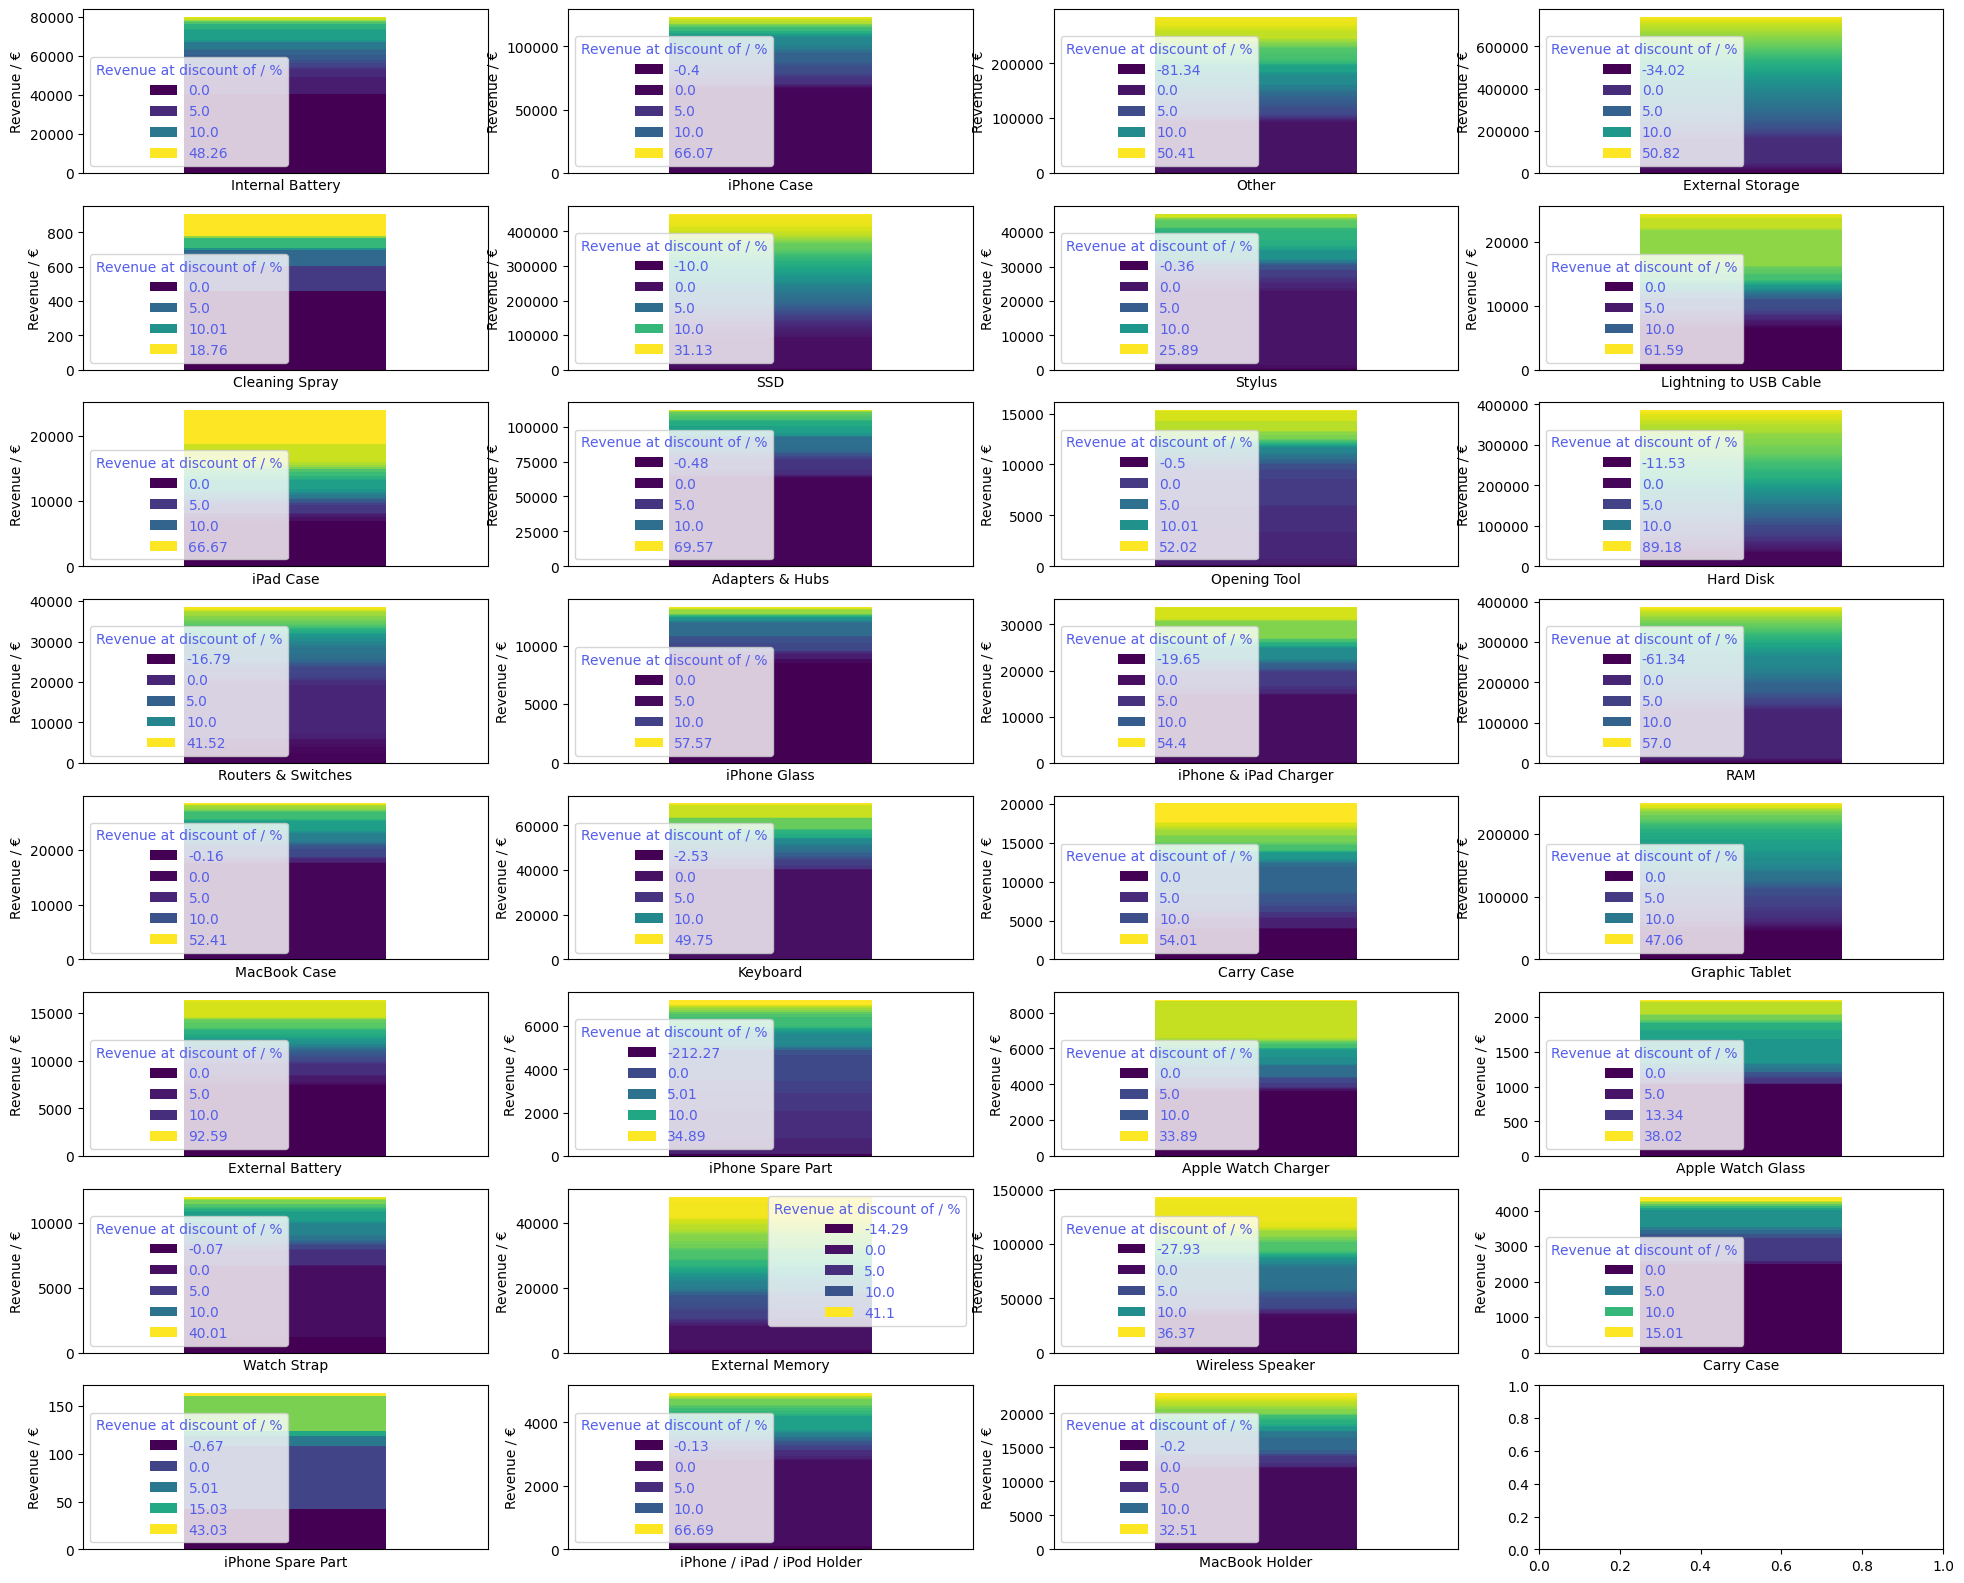

In [192]:
n = len(candidates_list)
row_size=4
fig, axs = plt.subplots(int((n+row_size-1)/row_size), row_size, figsize=(24, 20))
for c in range(n):
  create_plot(c, axs[int(c/row_size)][c%row_size])
plt.show()
#plt.savefig('revenues.pdf')
#files.download('revenues.pdf')

In [193]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-60%', '61-70%', '71-80%', '81-90%', '91-100%']
#add column with the discount bins to merged_orderlines
orderlines_with_products['discount_range'] = pd.cut(orderlines_with_products['discount_percentage'], bins=bins, labels=labels, right=False)
#CHECK column added
orderlines_with_products.head()

,id,id_order,sku,name,desc,type,type_name,category,Second_Hand,product_quantity,...,price,base_price,unit_price,total_price,discount,discount_percentage,discount_against_base_price,discount_base_percent,total_revenue,discount_range
0,1119116,299545,OWC0100,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,12755395,Installation Kit,Maintenance & Replacement Parts,NaN,1,...,60.99,49.99,47.49,47.49,13.50,22.13,2.5,5.0,6599.98,21-30%
1,1119119,299546,IOT0014,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,5720,iPhone / iPad / iPod Holder,Mounts & Stands,NaN,1,...,22.95,19.99,18.99,18.99,3.96,17.25,1.0,5.0,228.87,11-20%
2,1119120,295347,APP0700,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,13005399,MacBook Charger,Adapters & Chargers,NaN,1,...,89.00,75.99,72.19,72.19,16.81,18.89,3.8,5.0,2585.82,11-20%
3,1119134,299556,CRU0039-A,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,1298,Other,Hard Drives & SSD,NaN,1,...,76.99,60.90,60.90,60.90,16.09,20.90,0.0,0.0,60.90,21-30%
4,1119145,299561,PEB0015,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,11905404,Other,Smartwatch Accessories,NaN,1,...,299.99,149.99,142.49,142.49,157.50,52.50,7.5,5.0,3554.73,51-60%


In [194]:
top_10_categories = (orderlines_with_products
                     .groupby(['category'])
                     ['product_quantity'].sum()
                     .nlargest(10))
#filter dataframe to include items in top 10 categories
top_10_filtered = orderlines_with_products[orderlines_with_products['category'].isin(top_10_categories.index)]
#CHECK
top_10_filtered.head()

,id,id_order,sku,name,desc,type,type_name,category,Second_Hand,product_quantity,...,price,base_price,unit_price,total_price,discount,discount_percentage,discount_against_base_price,discount_base_percent,total_revenue,discount_range
0,1119116,299545,OWC0100,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,12755395,Installation Kit,Maintenance & Replacement Parts,NaN,1,...,60.99,49.99,47.49,47.49,13.50,22.13,2.5,5.0,6599.98,21-30%
2,1119120,295347,APP0700,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,13005399,MacBook Charger,Adapters & Chargers,NaN,1,...,89.00,75.99,72.19,72.19,16.81,18.89,3.8,5.0,2585.82,11-20%
3,1119134,299556,CRU0039-A,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,1298,Other,Hard Drives & SSD,NaN,1,...,76.99,60.90,60.90,60.90,16.09,20.90,0.0,0.0,60.90,21-30%
5,1119154,299563,BEA0065,Solo3 Beats Headphones Wireless On-Ear Rose Gold,Bluetooth helmets integrated chip W1 40h batte...,5384,Headphones & Headsets,Audio & Headphones,NaN,1,...,299.95,269.99,256.49,256.49,43.46,14.49,13.5,5.0,1445.04,11-20%
6,1119155,299564,SAT0010,Satechi Aluminum Silver Mouse,Aluminum mat with ultra soft non-slip surface ...,1387,Mouse,Mice & Keyboards,NaN,1,...,29.99,19.99,18.99,18.99,11.00,36.68,1.0,5.0,1457.42,31-40%


In [195]:
top_10_filtered['yearmonth'] = top_10_filtered.loc[:, 'date'].agg(lambda x: x.dt.strftime('%Y-%m'))

<ipython-input-195-2ce3076d35cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_filtered['yearmonth'] = top_10_filtered.loc[:, 'date'].agg(lambda x: x.dt.strftime('%Y-%m'))


<ipython-input-196-900572fbbd22>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_10_sales = (top_10_filtered.groupby(['category','discount_range'])['product_quantity'].sum().reset_index())


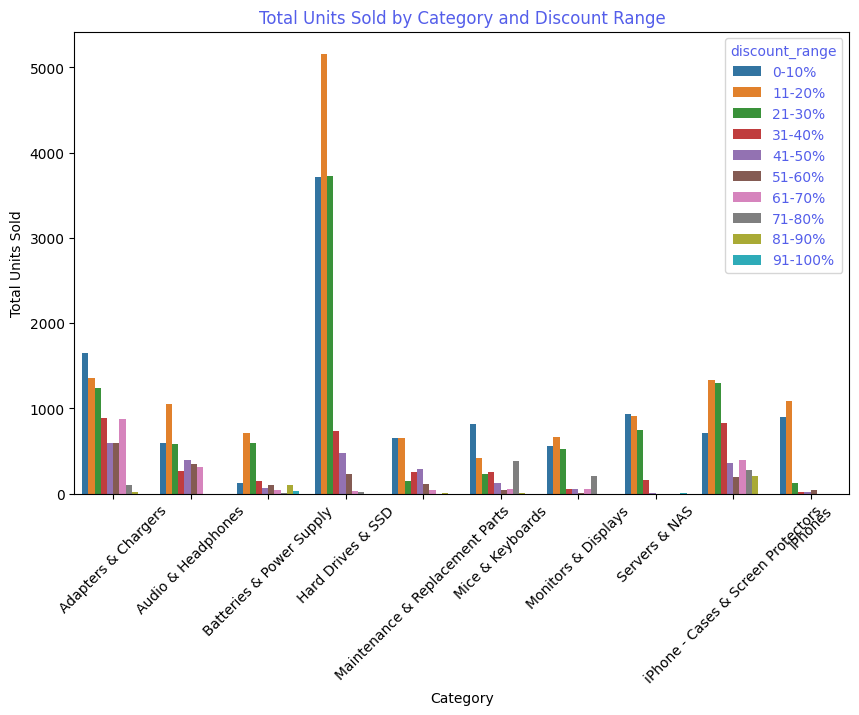

In [196]:
import seaborn as sns
# graph the correlation between discount and the total of units bought
top_10_sales = (top_10_filtered.groupby(['category','discount_range'])['product_quantity'].sum().reset_index())

#visualize sales
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_sales, x='category', y='product_quantity', hue='discount_range')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold by Category and Discount Range')
plt.show()

<ipython-input-197-311414422bfe>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_10_sales_over_time = (top_10_sales_over_time.groupby(['yearmonth', 'category','discount_range'])['product_quantity'].sum().reset_index())


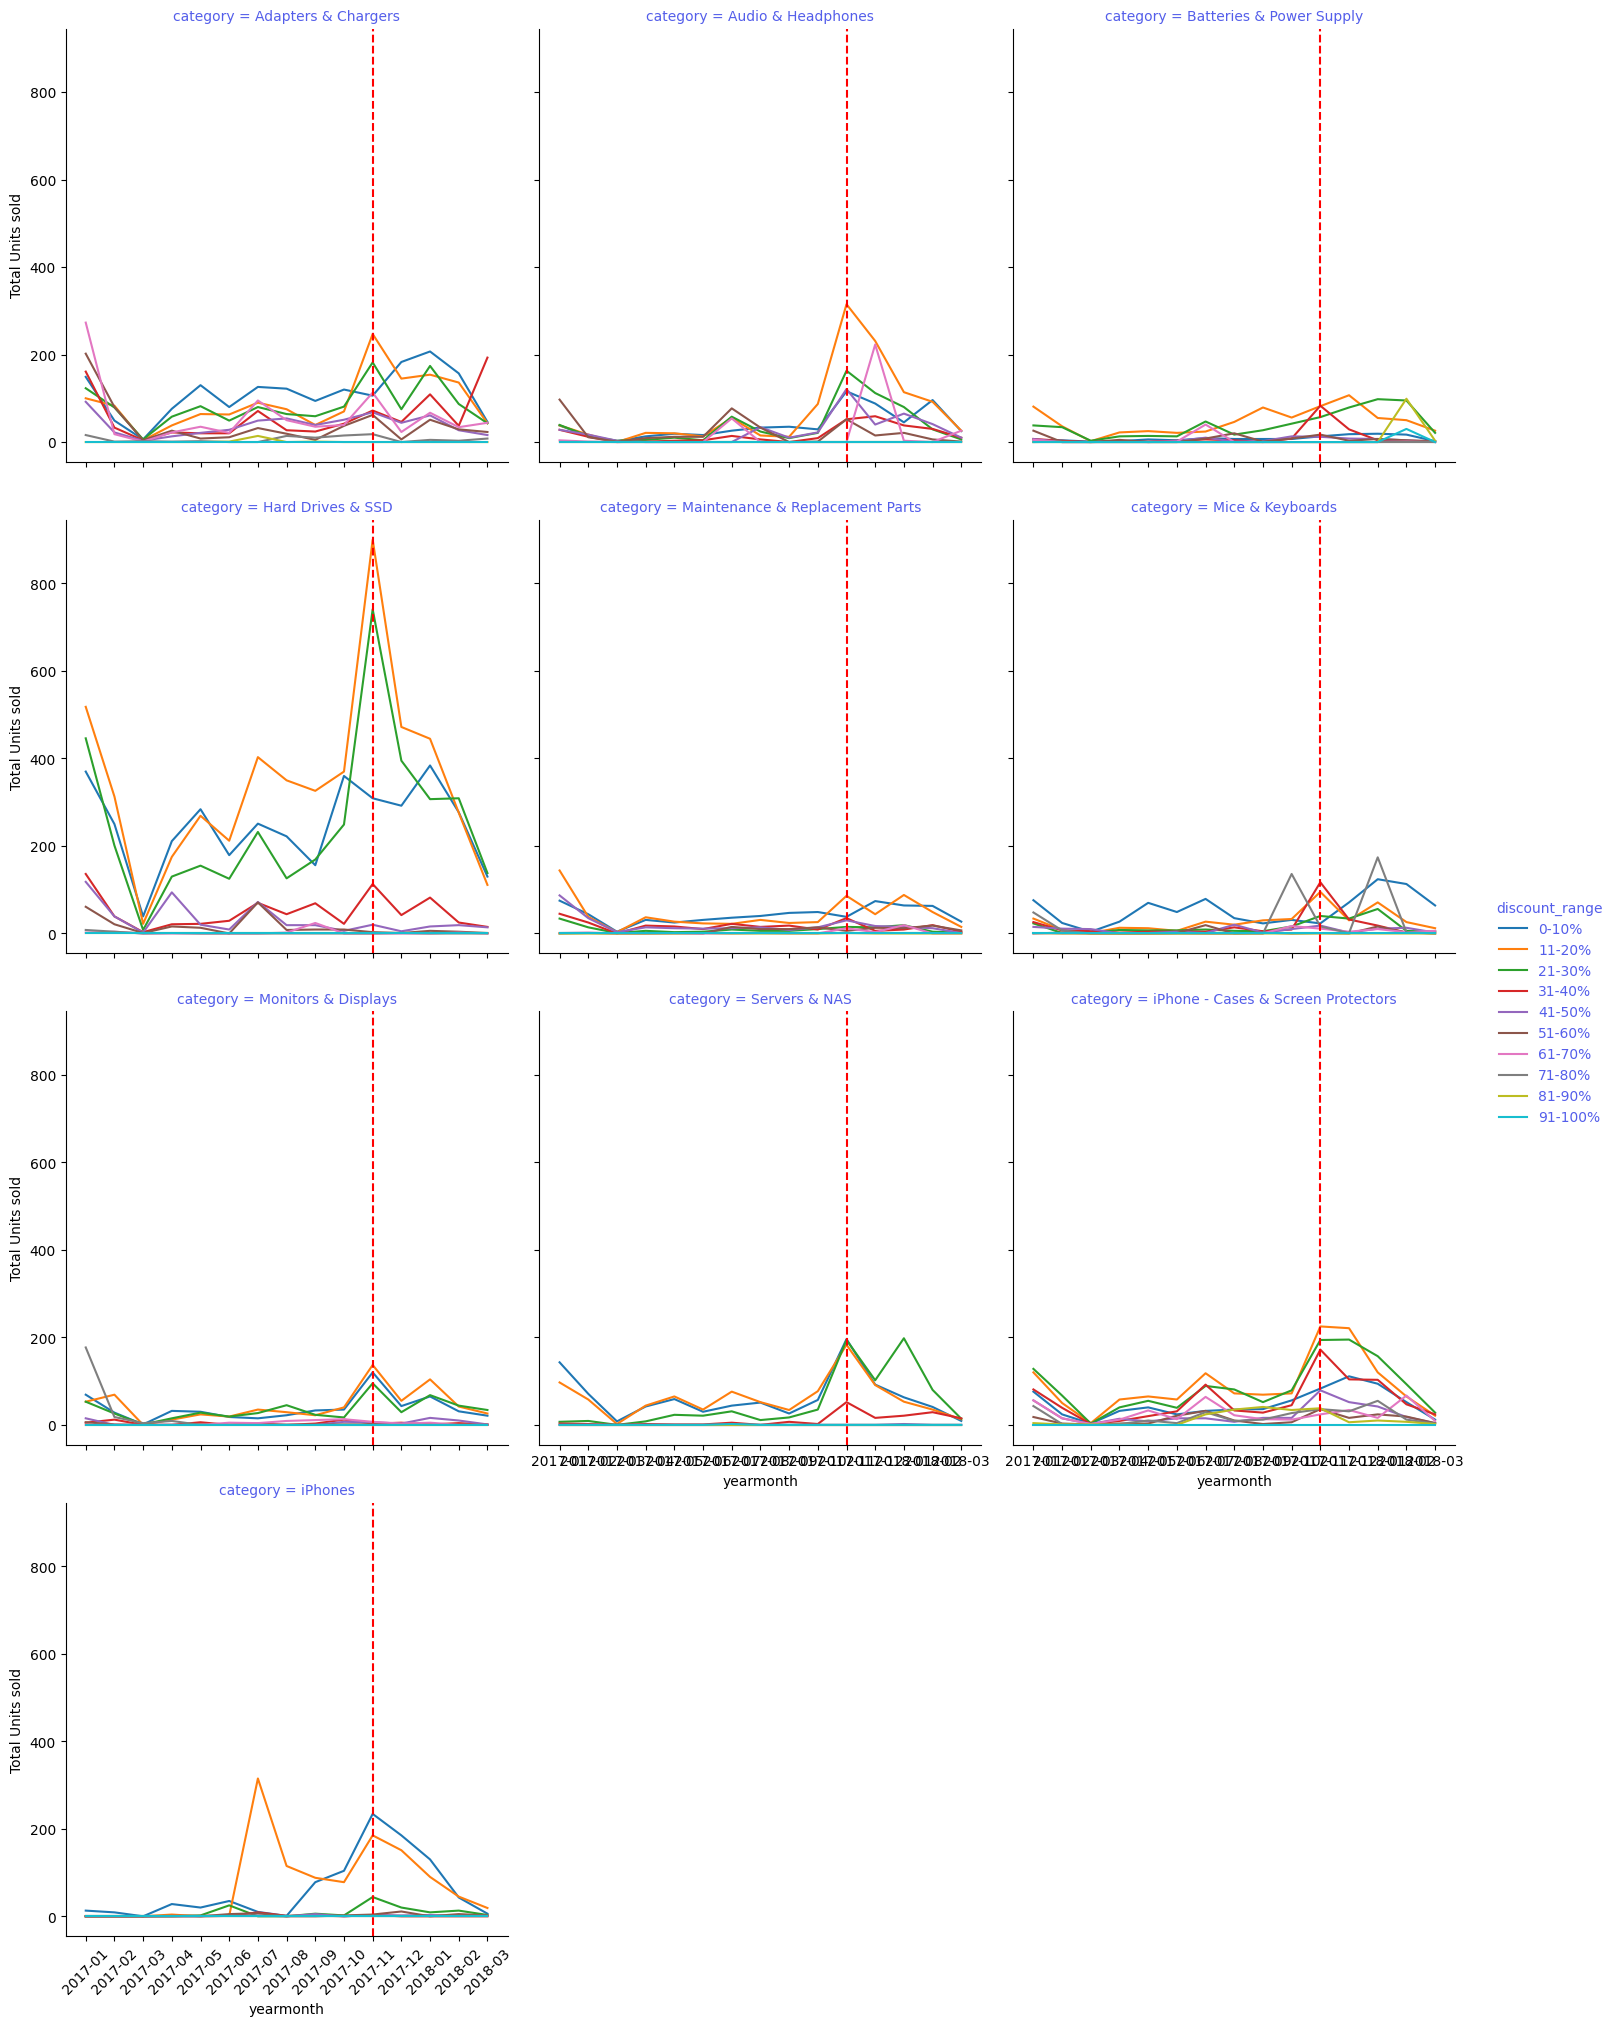

In [197]:
#top_10_sales = (top_10_filtered.groupby(['category','discount_range'])['product_quantity'].sum().reset_index())
top_10_sales_over_time = top_10_filtered.copy()

top_10_sales_over_time = (top_10_sales_over_time.groupby(['yearmonth', 'category','discount_range'])['product_quantity'].sum().reset_index())

g = sns.relplot(data=top_10_sales_over_time, kind='line', x='yearmonth', y='product_quantity', errorbar=None, hue='discount_range', col='category', col_wrap=3)
g.refline(x = '2017-11',
          color = "red",
         )
g.set_ylabels('Total Units sold')
plt.xticks(rotation=45)
plt.show()

In [198]:
top_10_sales_over_time.head()

,yearmonth,category,discount_range,product_quantity
0,2017-01,Adapters & Chargers,0-10%,149
1,2017-01,Adapters & Chargers,11-20%,100
2,2017-01,Adapters & Chargers,21-30%,123
3,2017-01,Adapters & Chargers,31-40%,161
4,2017-01,Adapters & Chargers,41-50%,92


<ipython-input-199-881832977430>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_10_revenue = (top_10_filtered.groupby(['category','discount_range'])['total_price'].sum().reset_index())


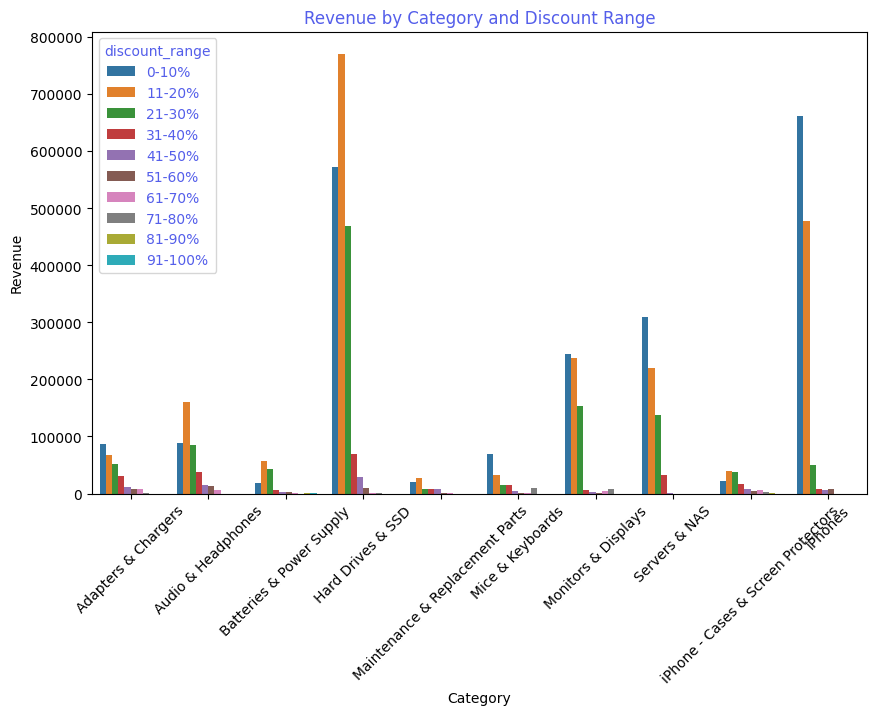

In [199]:
import seaborn as sns
# graph the correlation between discount and the total of units bought
top_10_revenue = (top_10_filtered.groupby(['category','discount_range'])['total_price'].sum().reset_index())

#visualize sales
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_revenue, x='category', y='total_price', hue='discount_range')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.title('Revenue by Category and Discount Range')
plt.show()

<ipython-input-200-12b0108efcfe>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_10_revenue_over_time = (top_10_revenue_over_time.groupby(['yearmonth', 'category','discount_range'])['total_price'].sum().reset_index())


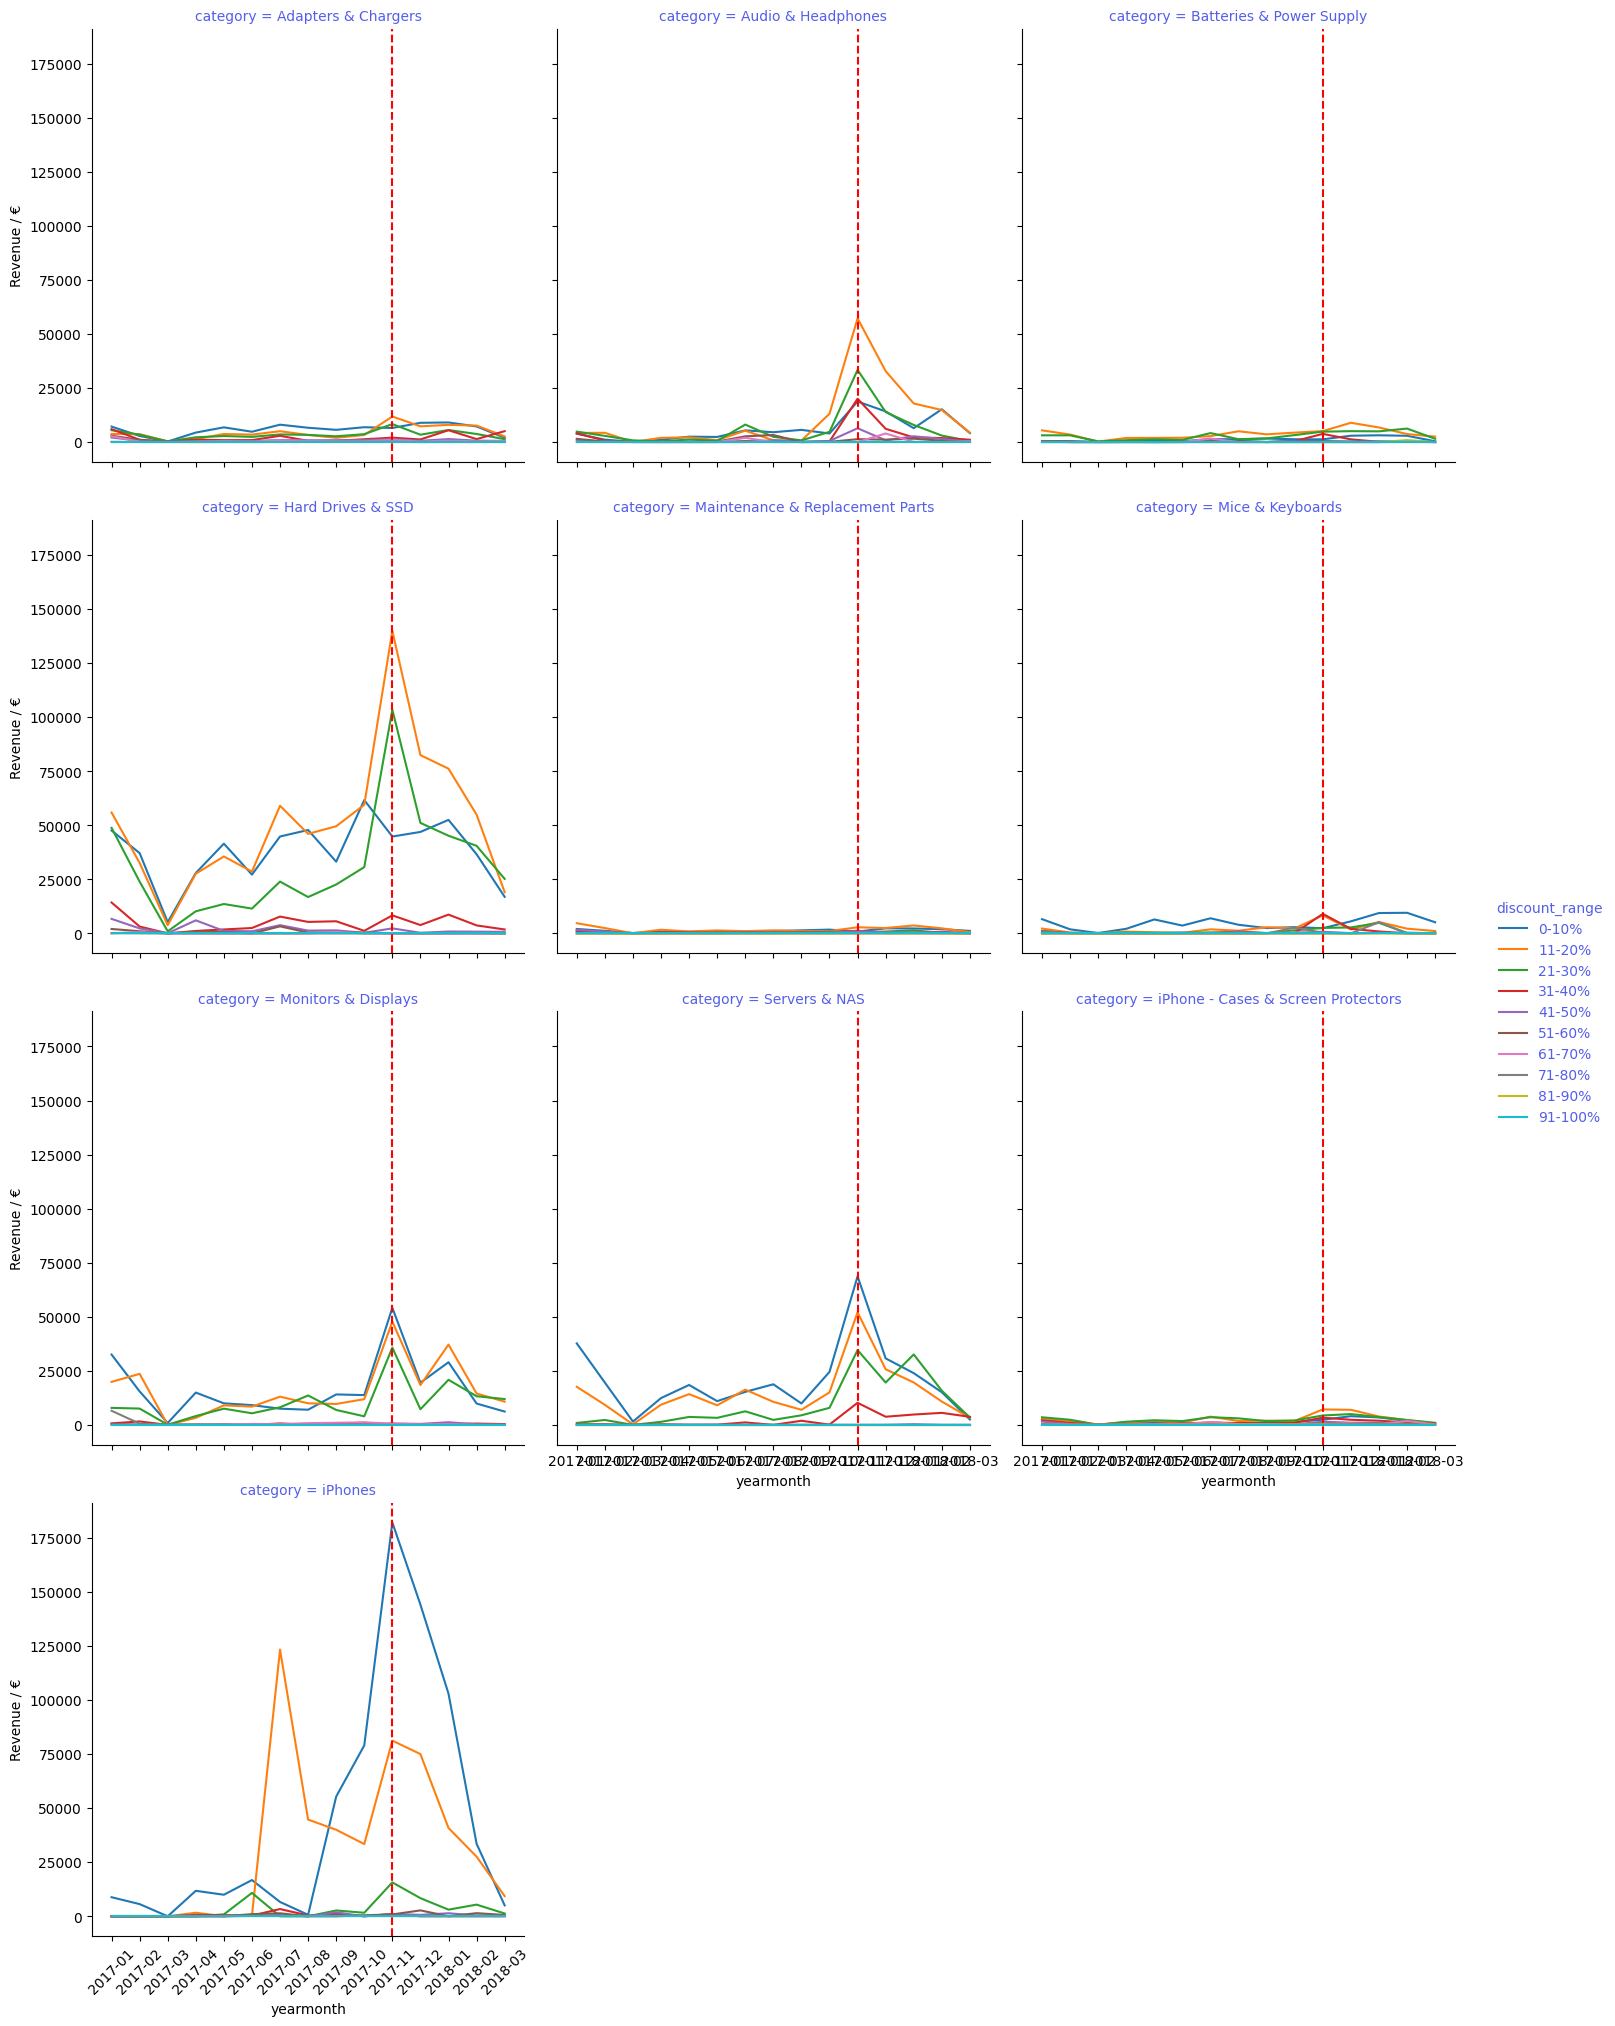

In [200]:
top_10_revenue_over_time = top_10_filtered.copy()

top_10_revenue_over_time = (top_10_revenue_over_time.groupby(['yearmonth', 'category','discount_range'])['total_price'].sum().reset_index())

g = sns.relplot(data=top_10_revenue_over_time, kind='line', x='yearmonth', y='total_price', errorbar=None, hue='discount_range', col='category', col_wrap=3)
g.refline(x = '2017-11',
          color = "red",
         )
g.set_ylabels('Revenue / €')
plt.xticks(rotation=45)
plt.show()

In [201]:
top_10_categories.index[0]

'Hard Drives & SSD'

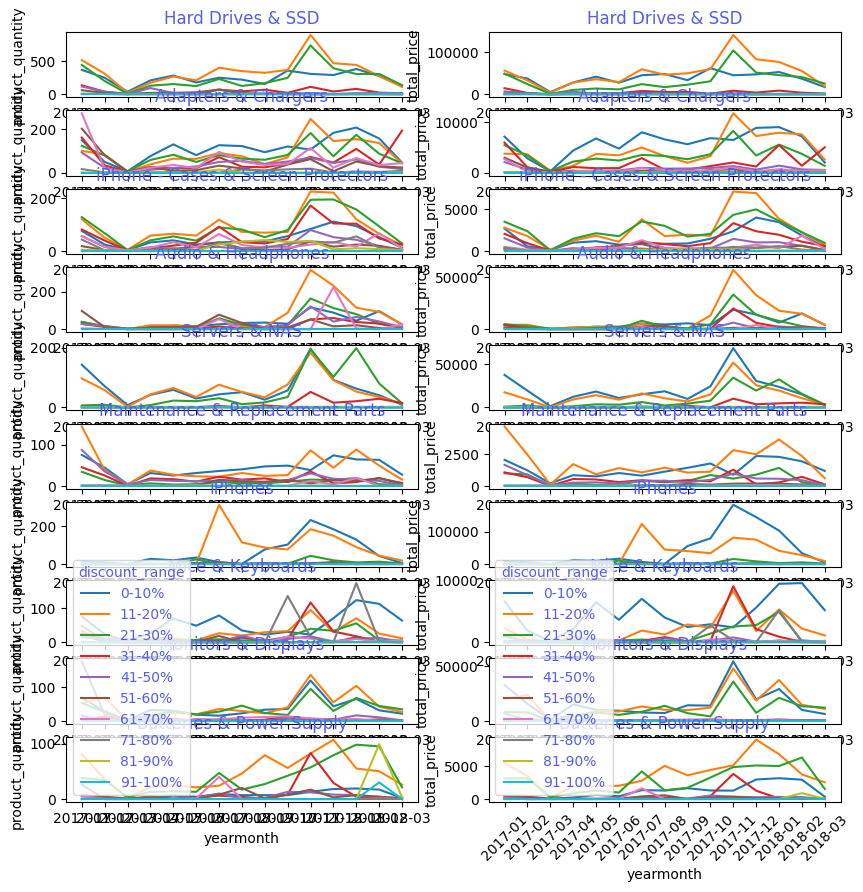

In [202]:
fig, axs = plt.subplots(10, 2, figsize=(10, 10))
for i in range(0, 10):
  if (i != 9):
    sns.lineplot(data=top_10_sales_over_time.loc[top_10_sales_over_time.loc[:, 'category']==top_10_categories.index[i]], x='yearmonth', y='product_quantity', errorbar=None, hue='discount_range', ax=axs[i][0], legend=None).set(title=top_10_categories.index[i])
    sns.lineplot(data=top_10_revenue_over_time.loc[top_10_revenue_over_time.loc[:, 'category']==top_10_categories.index[i]], x='yearmonth', y='total_price', errorbar=None, hue='discount_range', ax=axs[i][1], legend=None).set(title=top_10_categories.index[i])
  else:
    sns.lineplot(data=top_10_sales_over_time.loc[top_10_sales_over_time.loc[:, 'category']==top_10_categories.index[i]], x='yearmonth', y='product_quantity', errorbar=None, hue='discount_range', ax=axs[i][0]).set(title=top_10_categories.index[i])
    sns.lineplot(data=top_10_revenue_over_time.loc[top_10_revenue_over_time.loc[:, 'category']==top_10_categories.index[i]], x='yearmonth', y='total_price', errorbar=None, hue='discount_range', ax=axs[i][1]).set(title=top_10_categories.index[i])
plt.xticks(rotation=45)
plt.show()

In [204]:
orderlines_with_products.columns

Index(['id', 'id_order', 'sku', 'name', 'desc', 'type', 'type_name',
       'category', 'Second_Hand', 'product_quantity', 'date', 'price',
       'base_price', 'unit_price', 'total_price', 'discount',
       'discount_percentage', 'discount_against_base_price',
       'discount_base_percent', 'total_revenue', 'discount_range'],
      dtype='object')

In [206]:
orderlines_with_products['yearmonth'] = orderlines_with_products.loc[:, 'date'].agg(lambda x: x.dt.strftime('%Y-%m'))

In [210]:
orderlines_with_products.groupby('yearmonth')['product_quantity'].sum()

,product_quantity
yearmonth,
2017-01,6855
2017-02,2918
2017-03,246
2017-04,2132
2017-05,2573
2017-06,2051
2017-07,4625
2017-08,3023
2017-09,2788


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '2017-01'),
  Text(1, 0, '2017-02'),
  Text(2, 0, '2017-03'),
  Text(3, 0, '2017-04'),
  Text(4, 0, '2017-05'),
  Text(5, 0, '2017-06'),
  Text(6, 0, '2017-07'),
  Text(7, 0, '2017-08'),
  Text(8, 0, '2017-09'),
  Text(9, 0, '2017-10'),
  Text(10, 0, '2017-11'),
  Text(11, 0, '2017-12'),
  Text(12, 0, '2018-01'),
  Text(13, 0, '2018-02'),
  Text(14, 0, '2018-03')])

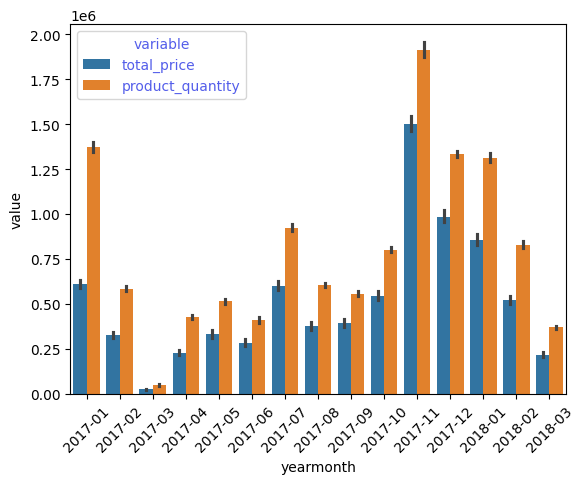

In [254]:
test = orderlines_with_products.loc[:, ['yearmonth', 'total_price', 'product_quantity']]
test['product_quantity'] = test.loc[:, 'product_quantity'] * 200
tidy = test.melt(id_vars='yearmonth')
sns.barplot(x='yearmonth', y='value', hue='variable', data=tidy, estimator='sum')
#sns.barplot(data=orderlines_with_products, x='yearmonth', y='total_price', estimator='sum', errorbar=None)
plt.xticks(rotation=45)